# Проект "Анализ поведения пользователей в мобильном приложении «Ненужные вещи»"

### Описание проекта
Мобильное приложение "Ненужные вещи" является платформой для поиска и покупки/продажи ненужных текущим владельцам вещей. Бизнес-модель продукта сконцентрирована на предоставление контактов пользователей для заврешения сделки между сторонами. В этом отношении продуктовая команда ставит своей целью улучшить пользовательский опыт, выявив основные сценарии поведения пользователей и сформировав стратегию дальнейшего улучшения продукта.

### Цели и задачи
Для реализации проекта требуется достичь следующих **целей**:
1. управление вовлеченностью клиента путем адаптации приложения по целевой и смежной аудитории.
2. выявить гипотезы, на основе которых будут выявлены пути улучшения пользовательского опыта.

Достижение поставленных целей требует решения следующих **задач**:
1. анализ связей целевого события — просмотра контактов — и других действий пользователей.
2. оценка того, какие действия чаще совершают те пользователи, которые просматривают контакты.
    - Проведите исследовательский анализ данных
    - Проанализируйте влияние событий на совершение целевого события
    - Проверьте статистические гипотезы:
        - Одни пользователи совершают действия `tips_show` и `tips_click` , другие — только `tips_show`. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.
        - Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.

### Описание данных
Для реализации проекта мы располагаем 2 датасетами: `mobile_dataset.csv` и `mobile_sources.csv`.  

Датасет `mobile_sources.csv` содержит следующие поля:
- `userId` — идентификатор пользователя,
- `source`— источник, с которого пользователь установил приложение.

Датасет `mobile_dataset.csv` содержит следующие поля:
- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Также заказчик уточняет виды действий, атрибуцированных в системе сбора данных. Заказчик определяет следующие виды действий:
- `advert_open` — открытие карточки объявления,
- `photos_show` — просмотр фотографий в объявлении,
- `tips_show` — демонстрация рекомендованных объявлений,
- `tips_click` — клик по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — просмотр номер телефона,
- `contacts_call` — звонок по номеру из объявления,
- `map` — открытие карты объявлений,
- `search_1` — `search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавление объявлений в избранное.

_____________________________________

## Загрузка данных
На начальном этапе нам необходимо импортировать библиотеки для дальнейшей работы с данными, а затем загрузить датасеты в датафреймы. По факту получения датафреймов мы сможем визуально оценить располагаемые данные, а также вывести информационную сводку по структуре и типам данных в датафреймах.  
Начнем с импорта необходимых библиотек.

In [1]:
# импортируем необходимые для проекта библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as st
import math as mth

Теперь, когда библиотеки загружены, мы располагаем инструментарием для загрузки датасетов в датафреймы и получения основной информации по ним.  
Загрузим датасеты в датафреймы и выведем их первые записи.

In [2]:
# загрузим располагаемые датасеты в соответствующие датафреймы
mobile = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')

# ознакомимся с полученными датафреймами
print('\nДатафрейм "mobile"')
display(mobile.head())
print('\nДатафрейм "mobile_sources"')
display(mobile_sources.head())


Датафрейм "mobile"


event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c


Датафрейм "mobile_sources"


userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

Полученные датафреймы соответствуют описанию. Дополним наше представление о данных информационной сводкой по структуре и типам.

In [3]:
# ознакомимся с информационной сводкой по структуре и типам датафреймов
print('Датафрейм "mobile"')
display(mobile.info())
print('\nДатафрейм "mobile_sources"')
display(mobile_sources.info())

Датафрейм "mobile"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None


Датафрейм "mobile_sources"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

Как мы видим, полученные датафреймы отличаются и далеки от стандарта для исследовательского анализа. Так, мы наблюдаем неконвенциональное наименование столбцов, а столбец с временными метками обозначен как тип `object`. По этой причине потребуется этап тщательной предобработки данных.

### Выводы
По факту загрузки данных и ознакомления с ними мы наблюдаем необходимость предобработки располагаемых данных. На этапе предобработки потребуется:
- переименовать названия столбцов,
- перевести временные метки из типа `object` в тип `datetime`,
- привести синонимичные наименования событий в единому значению,
- выяснить необходимость сведения значений разновидностей поиска к единому значению и при необходимости выполнить его,
- проверить данные на наличие пропусков (явных и неявных),
- проверить данные на наличие дубликатов (явных и неявных),
- объединить датафреймы в единый рабочий датафрейм.

-------------------------------------------------------

## Предобработка данных
На данном этапе мы подготовим данные к дальнейшему анализу, скорректировав выявленные на прошлом этапе недостатки и неточности.  
Начнем с переименования столбцов.

In [4]:
# переименуем названия столбцов к конвенциональному варианту
mobile.columns = mobile.columns.str.replace('.', '_', regex=False)
mobile_sources = mobile_sources.rename(columns={'userId': 'user_id'})

# проверим изменения
print(mobile.columns)
print(mobile_sources.columns)

Index(['event_time', 'event_name', 'user_id'], dtype='object')
Index(['user_id', 'source'], dtype='object')


Теперь наименования приведены к конвенцинальному формату. Теперь изменим тип временных меток из типа `object` в тип `datetime`.

In [5]:
# преобразовываем строки с временными метками в формат datetime
mobile['event_time'] = pd.to_datetime(mobile['event_time'])

# проверим изменение типа данных
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


В датафрейме `mobile` событие просмотра контактов имеет два названия при идентичном значении — `show_contacts` и `contacts_show`. Приведем данную метку к одному названию — `contacts_show`.

In [6]:
# заменим все названия меток "show_contacts" на "contacts_show"
mobile['event_name'] = mobile['event_name'].replace('show_contacts', 'contacts_show')

# проверим изменения
print(f'Кол-во значений "show_contacts": {mobile[mobile["event_name"] == "show_contacts"]["event_name"].count()}')
print(f'Кол-во значений "contacts_show": {mobile[mobile["event_name"] == "contacts_show"]["event_name"].count()}')

Кол-во значений "show_contacts": 0
Кол-во значений "contacts_show": 4529


Синонимичные метки сведены к одиному строковому литералу `contacts_show`. Теперь сфокусируемся на нескольких значениях для события поиска. Здесь потребуется решить, сводить ли вариации меток поиска к одному значению, или все-таки они имеют разное распределение, а следовательно, могут быть полезны в исследовательском аспекте проекта. Посмотрим, насколько распределены частотные значения названий в пределах одного действия. Если частотоность продемонстрирует сильную вариабельность, тогда разграничение разных видов поиска имеет особую значимость, и мы не сможем свести все к единому наименованию без потери инсайтов. Для этого создадим сводную таблицу и визуализируем распределение частотности событий поиска как относительно общего числа случаев, так и относительно использования уникальными пользователями.

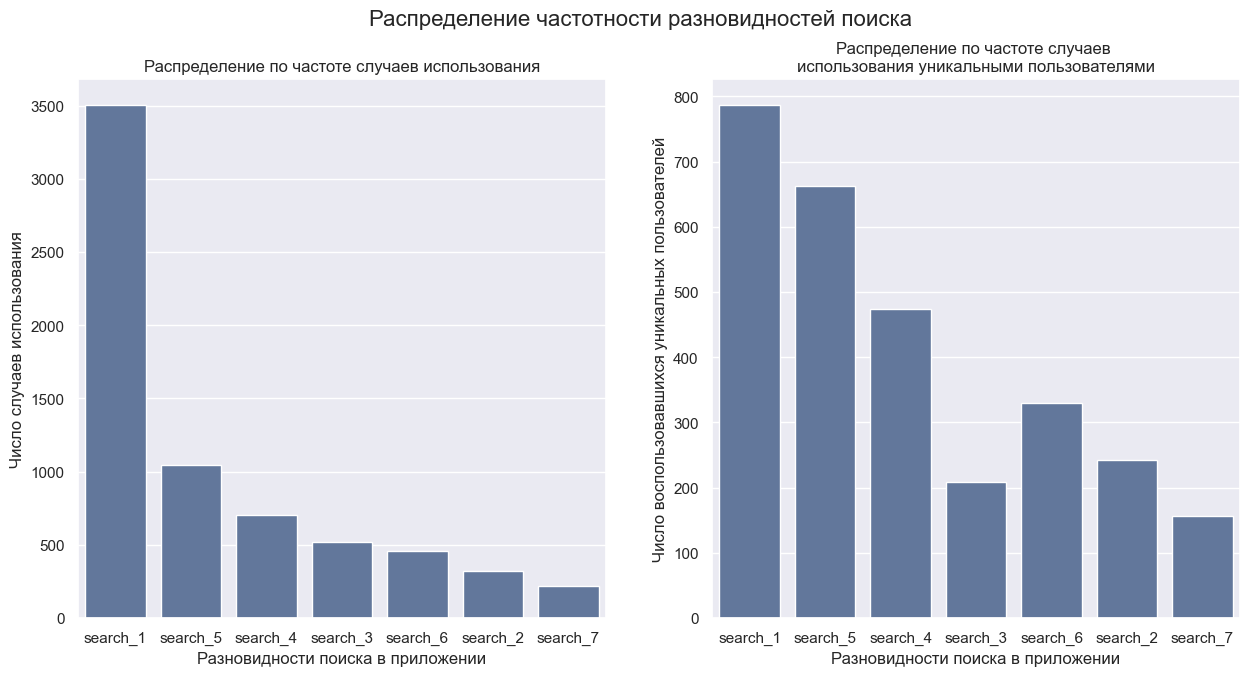

In [7]:
# создадим сводную таблицу с подсчетом количества вхождений разных видов поиска на отфильтрованных данных по подстроке "search"
search_pivot = mobile[mobile['event_name'].str.contains('search')].pivot_table(
    index = 'event_name',
    values = 'user_id',
    aggfunc = ['count', 'nunique'] # подсчитаем кол-во как случаев использования, так и отдельных пользователей
).sort_values(by=('count', 'user_id'), ascending=False).reset_index()

# визуализируем распределение частотности событий поиска
# зададим размер для общей площади 2 диаграмм, их общее оформление и название
figure = plt.figure(figsize=(15, 7))
sns.set_theme(style='darkgrid')
figure.suptitle('Распределение частотности разновидностей поиска', fontsize=16)

# строим первую столбчатую диаграмму
figure = plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data = search_pivot,
    y = ('count', 'user_id'),
    x = 'event_name',
    color = '#5975a4'
)
ax1.set_title('Распределение по частоте случаев использования')
ax1.set_xlabel('Разновидности поиска в приложении')
ax1.set_ylabel('Число случаев использования')

# строим вторую столбчатую диаграмму
figure = plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    data = search_pivot,
    y = ('nunique', 'user_id'),
    x = 'event_name',
    color = '#5975a4'
)
ax2.set_title('Распределение по частоте случаев \nиспользования уникальными пользователями')
ax2.set_xlabel('Разновидности поиска в приложении')
ax2.set_ylabel('Число воспользовавшихся уникальных пользователей')

plt.show()

Как мы видим, разновидности поиска не только отличаются друг от друга по распределению частотности, но и выстраиваются в определенную иерархию, где `search_1` — самое частотное событие поиска, а `search_7` — самое редкое. Более того, обшая градация сохраняется и при общем числе событий поиска, и при числе событий относительно уникальных пользователей. Исключение составляет `search_3`, которое относительно уникальных пользователей используется реже, нежели относительно всех случаев использования. Это различие лишь указывает на то, что отдельные пользователи намного чаще прочих используют тип поиска `search_3`. Учитывая выявленную закономерность, мы не можем свести все значения действий поиска к одному.  
Проверим данные на наличие пропусков.

In [8]:
# проверим датафреймы на наличие явных пропусков
for col in mobile.columns:
    print(f'Кол-во явных пропусков в столбце "{col}": {mobile[col].isna().sum()}')

for col in mobile_sources.columns:
    print(f'Кол-во явных пропусков в столбце "{col}": {mobile_sources[col].isna().sum()}')

Кол-во явных пропусков в столбце "event_time": 0
Кол-во явных пропусков в столбце "event_name": 0
Кол-во явных пропусков в столбце "user_id": 0
Кол-во явных пропусков в столбце "user_id": 0
Кол-во явных пропусков в столбце "source": 0


Явных пропусков не обнаружено, что подтверждается и представленной ранее информационной сводкой, однако в данных могут быть и неявные пропуски. Для выявления таковых рассмотрим уникальные значения некоторых столбцов.

In [9]:
# проверим датафреймы на наличие неявных пропусков
print(f'Уникальные значения столбца "event_name": {mobile["event_name"].unique()}')
print(f'Уникальные значения столбца "source": {mobile_sources["source"].unique()}')

# проверим столбец "event_time" на неявные пропуски через размах значений
print(f'Диапазон значений столбца "event_time": {mobile["event_time"].min()} — {mobile["event_time"].max()}')

Уникальные значения столбца "event_name": ['advert_open' 'tips_show' 'map' 'contacts_show' 'search_4' 'search_5'
 'tips_click' 'photos_show' 'search_1' 'search_2' 'search_3'
 'favorites_add' 'contacts_call' 'search_6' 'search_7']
Уникальные значения столбца "source": ['other' 'yandex' 'google']
Диапазон значений столбца "event_time": 2019-10-07 00:00:00.431357 — 2019-11-03 23:58:12.532487


Как мы видим, в строковых столбцах `event_name` и `source` нет значений-заглушек, а столбец `event_time` демонстрирует реалистичный диапазон примерно в 1 месяц (с 7 октября по 3 ноября 2019 г.). Таким образом, как явных, так и неявных пропусков в датафреймах нет.  
Проверим датафреймы на явные и неявные дубликаты.

In [10]:
# проверим датафреймы на наличие явных дубликатов
print(f'Количество явных дубликатов в датафрейме "mobile": {mobile.duplicated().sum()}')
print(f'Количество явных дубликатов в датафрейме "mobile_sources": {mobile_sources.duplicated().sum()}')

Количество явных дубликатов в датафрейме "mobile": 0
Количество явных дубликатов в датафрейме "mobile_sources": 0


Помимо явных дубликатов возможны и неявные. В условиях располагаемых датафреймов возможно дублирование действия пользователя в иденичную временную метку. Проверим такой риск по полям `user_id` и `event_time` датафрейма `mobile`.

In [11]:
# проверим датафреймы на наличие неявных дубликатов
print(f'Количество неявных дубликатов в датафрейме "mobile": {mobile.duplicated(subset=["user_id", "event_time"]).sum()}')

Количество неявных дубликатов в датафрейме "mobile": 0


Неявных дубликатов не обнаружено. Теперь, когда предобработка завершена, мы можем объединить датафреймы в один рабочий датафрейм для дальнейшего анализа и выявления ответов на исследовательские вопросы. По сути датафрейм `mobile_sources` представляет собой дополнительную атрибуцию пользователей по источнику привлечения, а это значит, что одной записи в датафрейме `mobile_sources` будет соответствовать несколько записей в датафрейме `mobile`. Оптимальным вариантом будет объединение датафреймов в один по полю `user_id` при левом типе соединения, где левая таблица — `mobile`, а правая — `mobile_sources`.

In [12]:
# объединим датафреймы в единый датафрейм "data"
data = mobile.merge(right=mobile_sources, how='left', on='user_id')

# проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


По факту получения единого датафрейма из двух предобработанных датафреймов мы можем приступить к исследовательскому анализу данных.

### Выводы
На данном этапе была успешно проведена предобработка данных. В ходе предобработки были выполнены следующие операции:
- переименование столбцов в конвенциональном формате,
- преобразование столбца `event_time` из строки в тип `datetime`,
- сведение синонимичных категориальных значений действия просмотра контакта к единому значению `contacts_show`,
- выявление значимых различий в разновидностях действий поиска,
- проверка данных на явные и неявные пропуски,
- проверка данных на явные и неявные дубликаты,
- объединение представленных датафреймов в единый рабочий датафрейм `data`.
По факту предобработки данных получен цельный датафрейм, подходящий для исследовательского анализа данных.

___________________________________________________________________

## Исследовательский анализ данных
На данном этапе нам необходимо вывести базовые сценарии поведения пользователей в приложении с учетом целевого действия (`contacts_show`), а также рассчитать воронки по выявленным сценариям. Для начала выясним основные характеристики пользователей, включая их сессии в приложении. Начнем с того, сколько всего пользователей использовало приложение за рассматриваемый период.

In [13]:
# выясним, сколько всего пользователей использовало приложение за рассматриваемый период
print(f'Всего уникальных пользователей в приложении: {data["user_id"].nunique()}')

Всего уникальных пользователей в приложении: 4293


Приложением за период с 7 октября по 3 ноября 2019 г. пользовалось 4293 человека. Посмотрим, сколько событий приходится на 1 пользователя.

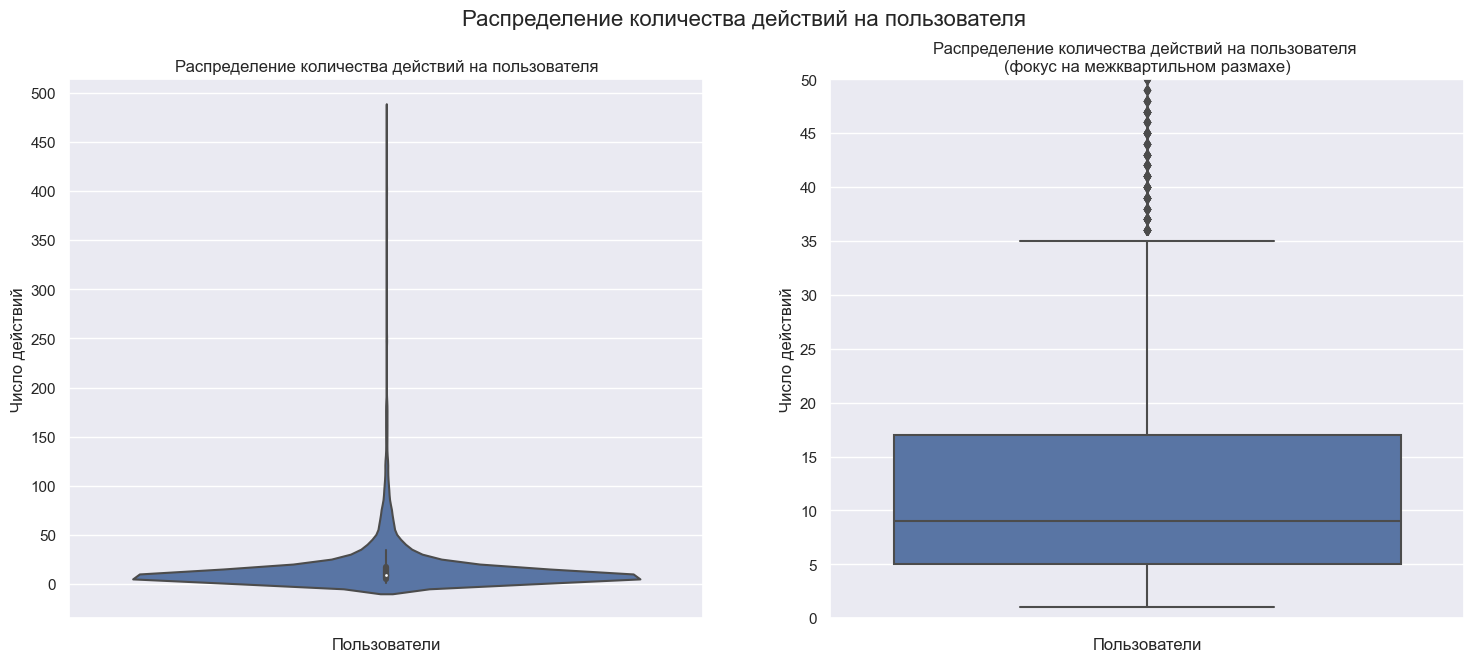

In [14]:
# выявим распределение количества действий на одного пользователя
# сгруппируем данные по пользователям и подсчитаем количество случаев использования
actions_grouped = data.groupby('user_id')['user_id'].agg('count')

# построим violinplot для визуализации распределения числа действий на пользователя
figure = plt.figure(figsize=(18, 7))
figure.suptitle('Распределение количества действий на пользователя', fontsize=16)

# построим violinplot для визуализации плотности распределения числа действий на пользователя
figure = plt.subplot(1, 2, 1)
ax1 = sns.violinplot(y=actions_grouped)
ax1.set_title('Распределение количества действий на пользователя')
ax1.set_xlabel('Пользователи')
ax1.set_ylabel('Число действий')
plt.yticks(np.arange(0, 501, step=50)) # настроим более точные шкалы

# построим boxplot для визуализации распределения числа действий с фокусом на IQR
figure = plt.subplot(1, 2, 2)
ax2 = sns.boxplot(y=actions_grouped)
ax2.set_title('Распределение количества действий на пользователя \n(фокус на межквартильном размахе)')
ax2.set_xlabel('Пользователи')
ax2.set_ylabel('Число действий')
plt.ylim(0, 50) # ограничим диаграмму фокусом на IQR
plt.yticks(np.arange(0, 51, step=5)) # настроим более точные шкалы

plt.show()

Как мы видим, действия пользователей в приложении за месяц в подавляющем большинстве ограничиваются 35 действиями с медианой в 9 действий. Однако также присутствуют пользователи, чья активность в приложении насчитывает от 100 до 450 действий, что вполне объяснимо: помимо большинства пользователей с умеренным использованием платформы часто выделяется и активное меньшинство с повышенной активностью. Пока рано делать основательные выводы по вовлеченности пользователей в приложении, т.к. мы не получили рапсределение безотносительно числа сессий и количества действий в них. Для этого выявим сессии пользователей, однако здесь важно учитывать несколько моментов:
- необходимо выявить резонный тайм-аут для сессий,
- высчитать количество сессий на для каждого пользователя,
- пронумеровать сессии по принципу счетчика,
- подсветить основные характеристики типичной сессии пользователя.

Начнем с выявления срока для тайм-аута сессии.

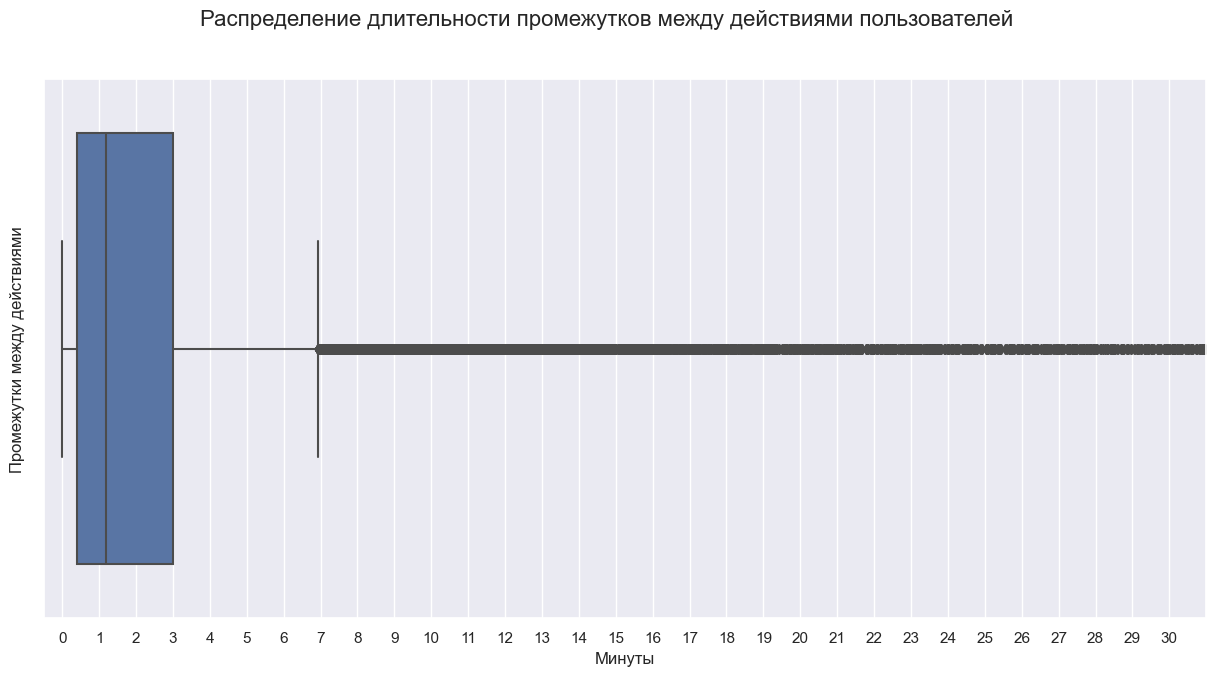

In [15]:
# создадим серию разниц между событиями, сгруппированными по пользователям
time_steps = data.sort_values(by=['user_id', 'event_time']).groupby('user_id')['event_time'].diff().dropna()

# полученные временные отрезки приведем к минутам (60 секунд)
time_steps = time_steps.dt.total_seconds() / 60

# визуализируем полученное распределение ящиком с усами
figure = plt.figure(figsize=(15, 7))
ax = sns.boxplot(x=time_steps)
plt.xticks(np.arange(0, 31, step=1)) # настроим более точные шкалы
ax.set_xlabel('Минуты')
ax.set_ylabel('Промежутки между действиями')
figure.suptitle('Распределение длительности промежутков между действиями пользователей', fontsize=16)
plt.xlim(-0.5, 31) # ограничим диаграмму фокусом на IQR

plt.show()

Распределение длительности промежутков демонстрирует типовой диапазон до 3 минут (75% ото всех наблюдений). Остальные промежутки представляют последний квартиль. Усы достигают 7 минут, а оставшиеся значения — явные выбросы или же разницы между уже явно разными сессиями одного пользователя. Оптимальным сроком для тайм-аута сессии пользователя будет 7 минут.  
Теперь, когда мы выявили тайм-аут для пользовательской сессии, мы можем выделить сами сессии и их составные события. Для этого отсортируем временные метки по возрастанию, сгруппируем их по пользователям, а затем сравним промежутки с тайм-аутом сессии. Если промежуток в пределах тайм-аута, тогда группируем в действие в ту же сессию, если же нет — тогда действие будет относиться к уже другой сессии.

In [16]:
# создадим отдельную серию идентификаторов сессий
session = (data.sort_values(by=['user_id', 'event_time']).
              groupby('user_id')['event_time'].diff() > pd.Timedelta(minutes=7)).cumsum()

# внесем в новый столбец "session" рабочего датафрейма идентификаторы сессий
data['session_id'] = data.groupby(['user_id', session], sort=False).ngroup() + 1

# проверим результат
data.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id  source  session_id  
0  020292ab-89bc-4156-9acf-68bc2783f894   other           1  
1  020292ab-89bc-4156-9acf-68bc2783f894   other           1  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  
3  020292ab-89bc-4156-9acf-68bc2783f894   other           1  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2

В результате мы получили числовые идентификаторы сессий, которые соответствуют своим составляющим их действиям. Посмотрим, сколько всего сессий было за рассматриваемый период.

In [17]:
# выведем число сессий за рассматриваемый период
print(f'Всего сессий за период с 7.10 по 3.11: {data["session_id"].nunique()}')

Всего сессий за период с 7.10 по 3.11: 14167


14167 сессий использования приложения зафиксировано за рассматриваемый период. Дополним наши наблюдения распределением количества сессий на уникального пользователя.

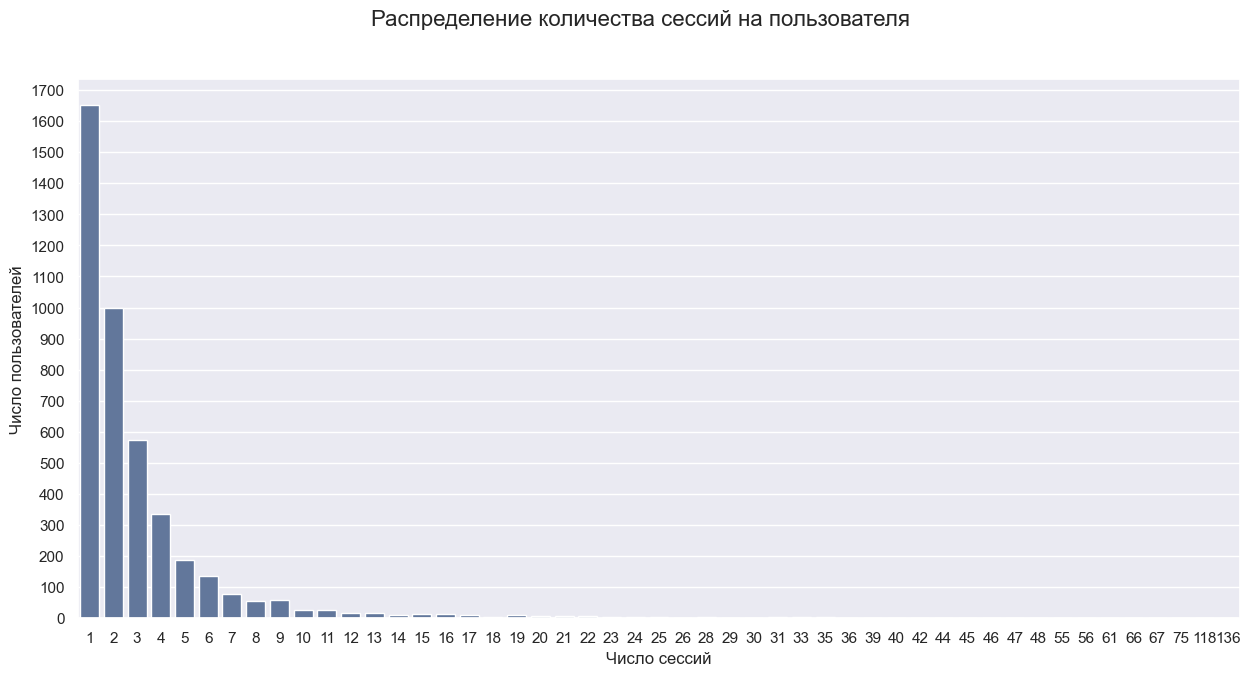

In [18]:
# создадим сводную таблицу с числом сессий в качестве категории и числов пользователей в каждой категории
users_per_session = (
    data.groupby('user_id')['session_id'].agg('nunique').reset_index().
    groupby('session_id')['user_id'].agg('count').reset_index().rename(
        columns={
        'session_id': 'sessions_cnt', 
        'user_id': 'users_cnt'
    })
)

# визуализируем получившееся распределение количества сессий на отдельного пользователя
figure = plt.figure(figsize=(15, 7))
ax = sns.barplot(data=users_per_session, x='sessions_cnt', y='users_cnt', color='#5975a4')
plt.yticks(np.arange(0, 1701, step=100)) # настроим более точные шкалы
ax.set_xlabel('Число сессий')
ax.set_ylabel('Число пользователей')
figure.suptitle('Распределение количества сессий на пользователя', fontsize=16)

plt.show()

Большая часть пользователей имеет до 6 сессий, а оставшиеся пользователи с б*о*льшим количеством сессий уже не набирают и 100 человек. Такой аспект важно учитывать относительно бизнес-модели, т.к. от частоты и количества случаев использования зависит то, с какой периодичностью следует ожидать достижения целевого действия. Относительно диаграммы выше мы также можем сказать, что пользователи либо застревают на первом этапе воронки, либо возвращаются, чтобы получить кантакты, либо, упрощая, не удовлетворены использованием приложения и больше не возвращаются. Дополним распределение сессий их динамикой по дням и по неделям за рассматривемый период. Возможно, там будут дополнительные детали по такому высокому показателю пользователей с одной сессией.

In [19]:
# добавим столбцы с днем и неделей сессии
data['day'] = data['event_time'].dt.strftime('%m.%d')
data['week'] = data['event_time'].dt.isocalendar().week

# проверим результат
data.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id  source  session_id    day  week  
0  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41  
1  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41  
3  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41

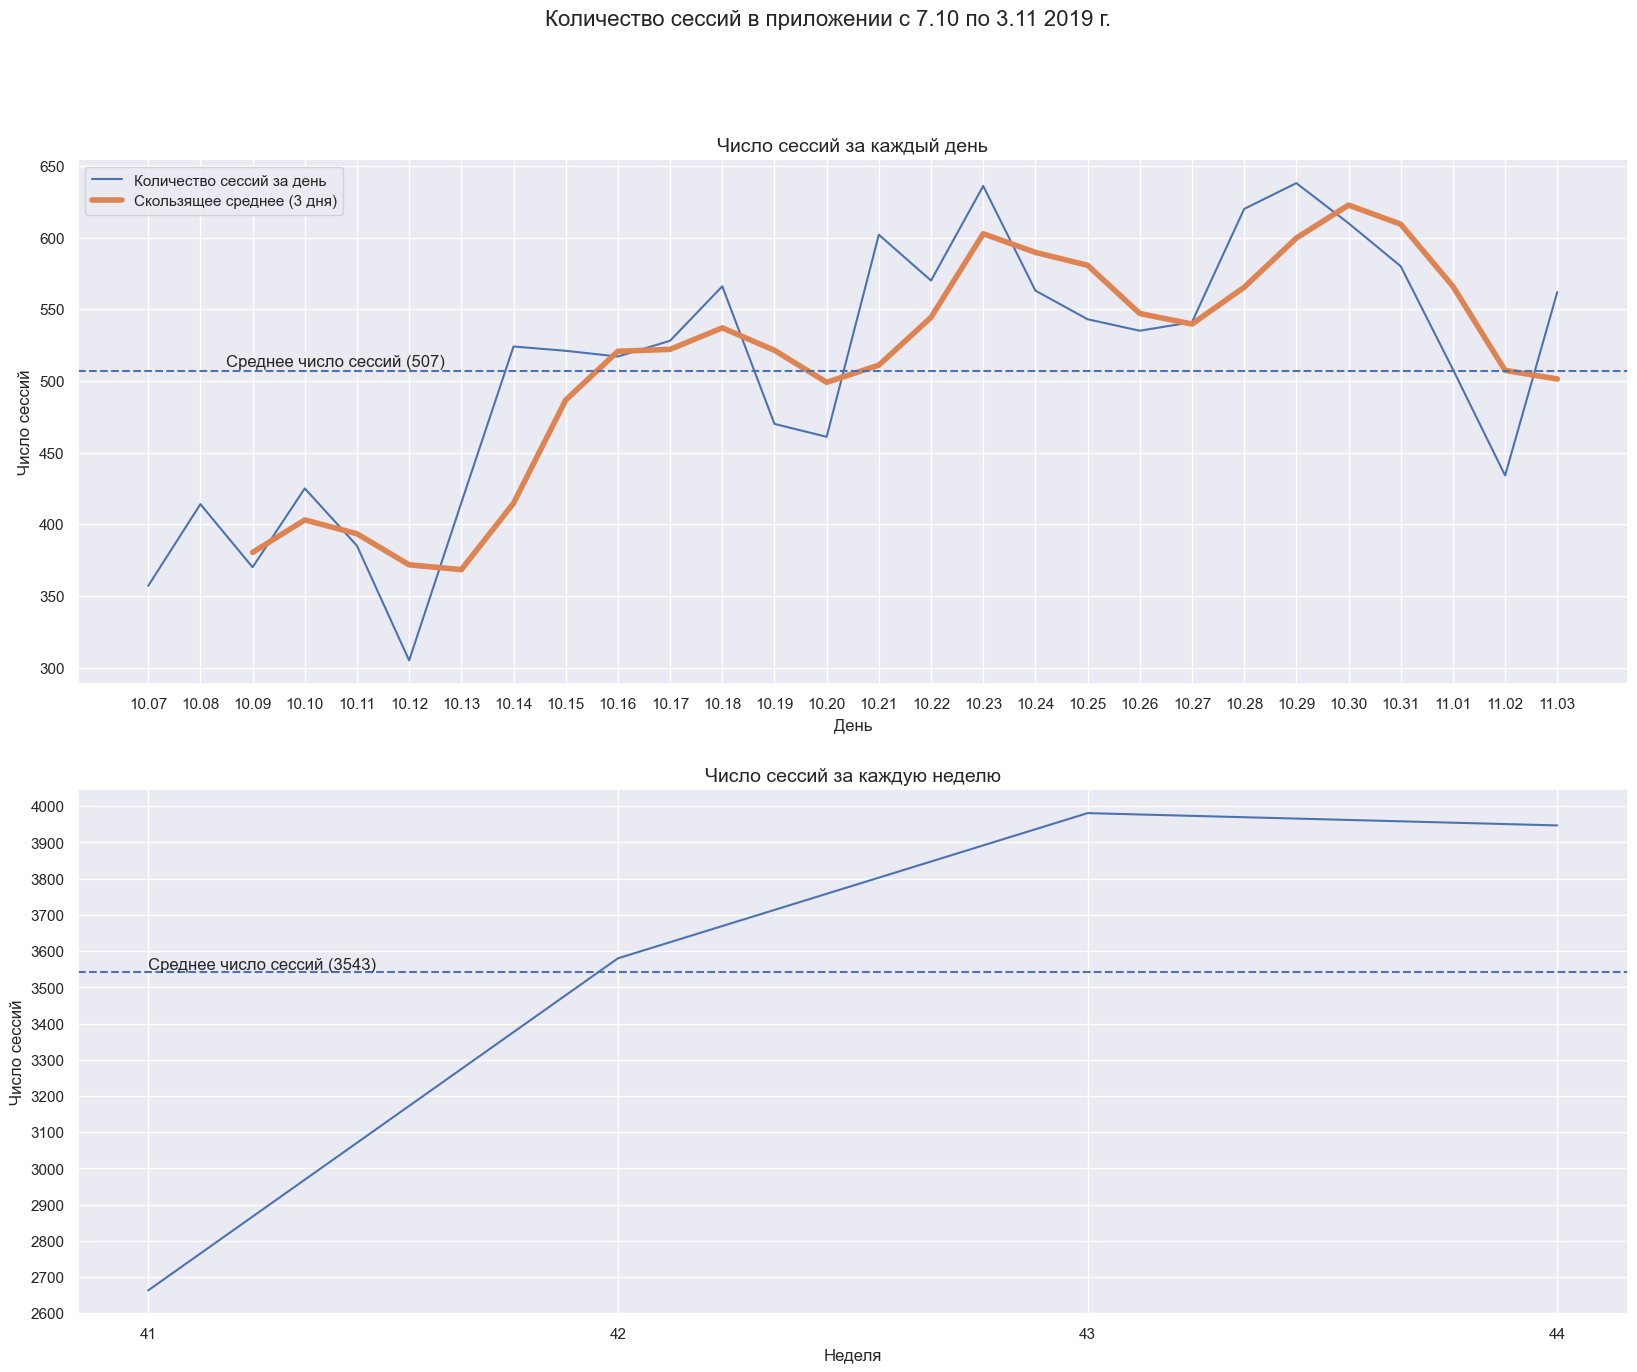

In [20]:
# подготовим данные к визулизации, сгруппировав их по дням и неделям с подсчетом количества сессий в группе
sessions_per_day = data.groupby('day')['session_id'].agg('nunique').reset_index().sort_values(by='day')
sessions_per_week = data.groupby('week')['session_id'].agg('nunique').reset_index().sort_values(by='week')

# добавим скользящее среднее к показателям сессий за день
sessions_per_day['rolling_3_avg'] = sessions_per_day['session_id'].rolling(3).mean()

# визуализируем количество сессий в день
# зададим размер для общей площади 2 диаграмм
figure = plt.figure(figsize=(20, 15))
figure.suptitle('Количество сессий в приложении с 7.10 по 3.11 2019 г.', fontsize=16)

# строим первую линейную диаграмму
figure = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(
    data = sessions_per_day, 
    x = 'day', 
    y = 'session_id',
    label = 'Количество сессий за день'
)
ax1 = sns.lineplot(
    data = sessions_per_day, 
    x = 'day', 
    y = 'rolling_3_avg',
    label = 'Скользящее среднее (3 дня)',
    linewidth = 4
)
ax1.set_title('Число сессий за каждый день', fontsize=14)
ax1.set_xlabel('День')
ax1.set_ylabel('Число сессий')
plt.yticks(np.arange(300, 651, step=50)) # настроим более точные шкалы
ax1.axhline(sessions_per_day['session_id'].mean(), ls='--')
ax1.text(1.5,510, f'Среднее число сессий ({sessions_per_day["session_id"].mean():.0f})')

# создаем массивы numpy в обход ошибки совместимости seaborn и numpy
sessions_per_week['week'] = np.array(sessions_per_week['week'], dtype=int)
sessions_per_week['session_id'] = np.array(sessions_per_week['session_id'], dtype=float)

# строим вторую линейнуюую диаграмму
figure = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(
    data = sessions_per_week, 
    x = 'week', 
    y = 'session_id'
)
ax2.set_title('Число сессий за каждую неделю', fontsize=14)
ax2.set_xlabel('Неделя')
ax2.set_ylabel('Число сессий')
plt.xticks(np.arange(41, 45, step=1)) # настроим шкалы, чтобы  отменить интерполяцию
plt.yticks(np.arange(2600, 4001, step=100)) # настроим более точные шкалы
ax2.axhline(sessions_per_week['session_id'].mean(), ls='--')
ax2.text(41,3550, f'Среднее число сессий ({sessions_per_week["session_id"].mean():.0f})')

plt.show()

Среднее число сессий за день - 507, а за неделю - 3543. Заметны низкие показатели пользовательских сессий за первую неделю (<2700), однако уже ко второй неделе (или к 14.10) число сессий возрастает до текущего уровня: свыше 3500 за неделю или 500 за день. Дополним диаграммы по сессиям визуализациями по метрикам DAU и WAU. MAU визуализировать не будем, т.к. у нас нет данных за хотя бы 1 полный месяц, а за рассматриваемый период количество уникальных пользователей нам уже известно: 4293.

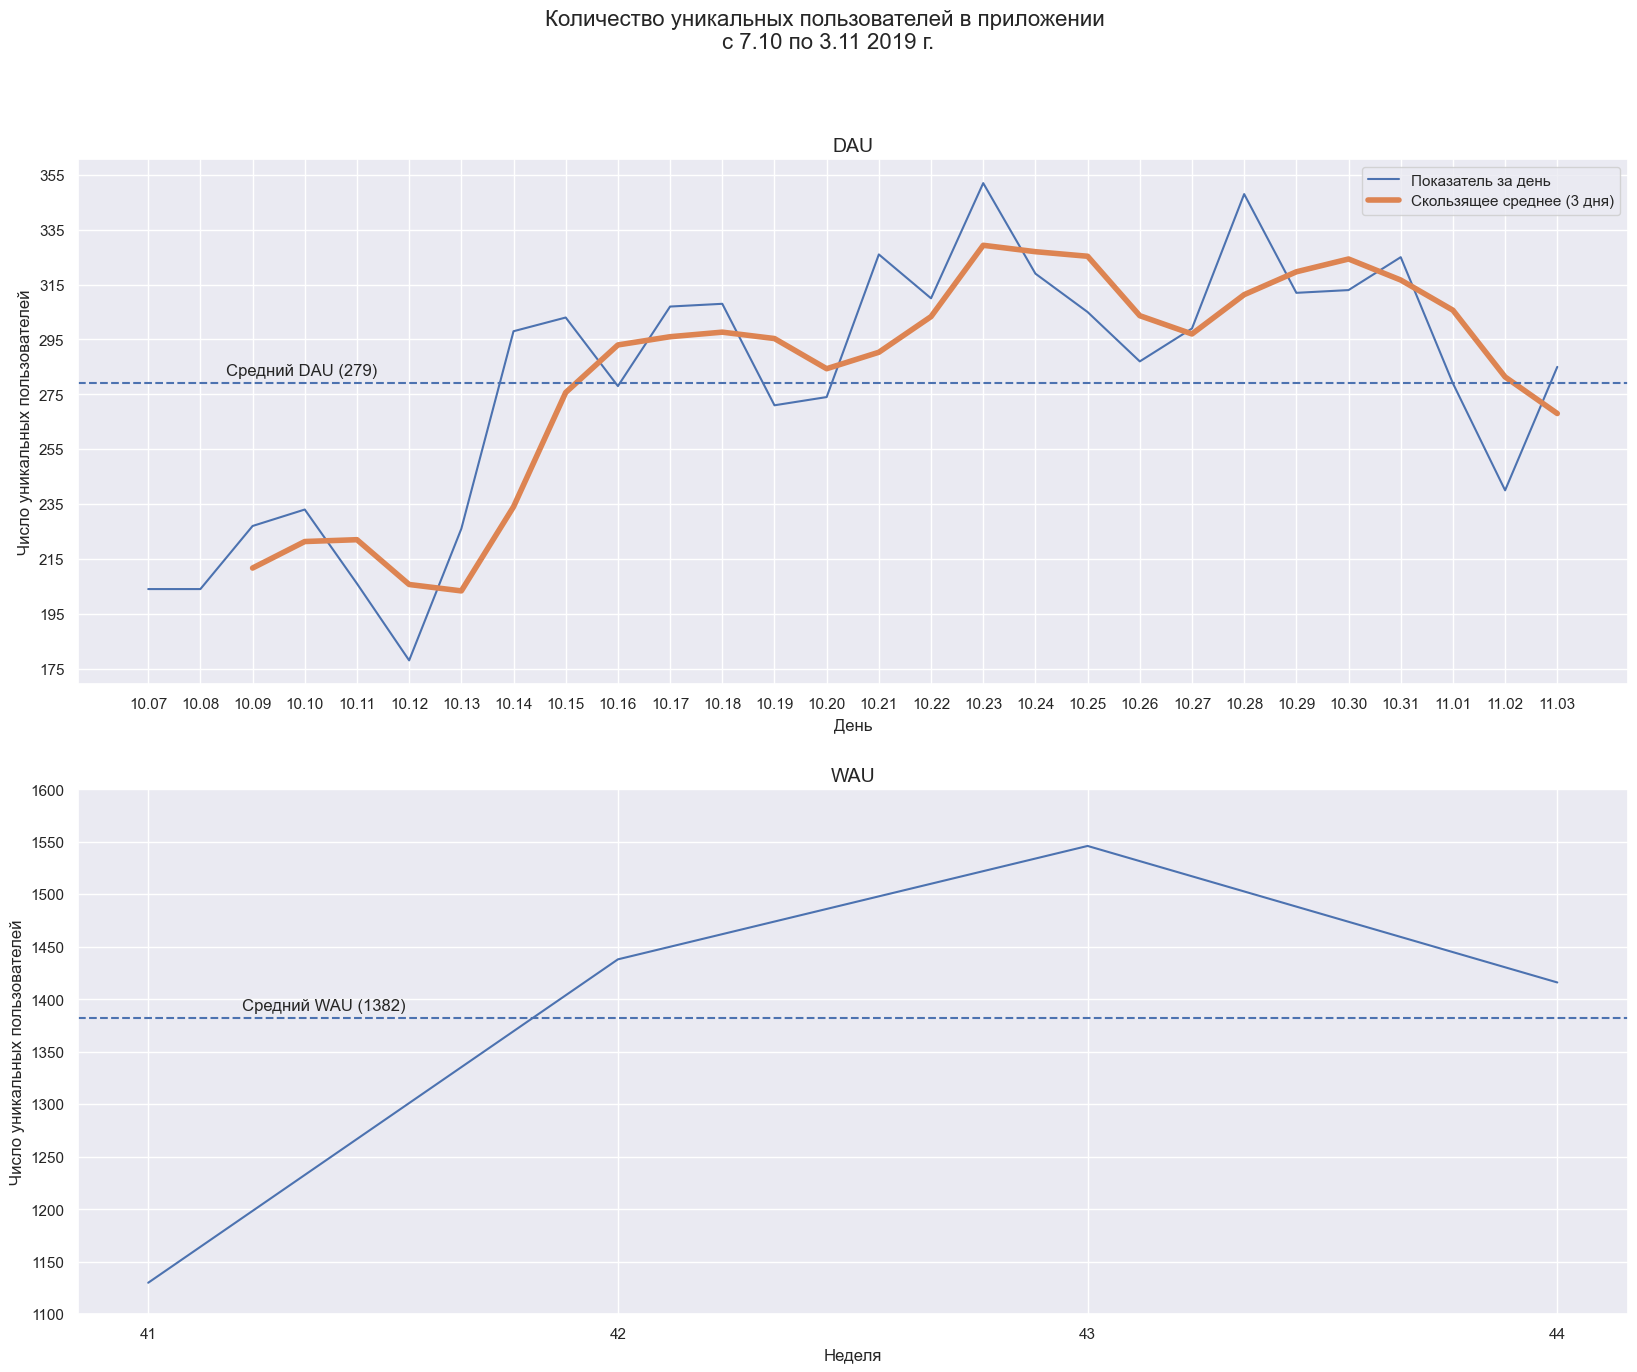

In [21]:
# подготовим количество уникальных пользователей за дни и недели путем группировки
dau = data.groupby('day')['user_id'].agg('nunique').reset_index().sort_values(by='day')
wau = data.groupby('week')['user_id'].agg('nunique').reset_index().sort_values(by='week')

# добавим скользящее среднее к показателям DAU
dau['rolling_3_avg'] = dau['user_id'].rolling(3).mean()

# визуализируем количество уник. пользователей за дни и недели
# зададим размер для общей площади 2 диаграмм
figure = plt.figure(figsize=(20, 15))
figure.suptitle('Количество уникальных пользователей в приложении \nс 7.10 по 3.11 2019 г.', fontsize=16)

# строим первую линейную диаграмму
figure = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(
    data = dau, 
    x = 'day', 
    y = 'user_id',
    label = 'Показатель за день'
)
ax1 = sns.lineplot(
    data = dau, 
    x = 'day', 
    y = 'rolling_3_avg',
    label = 'Скользящее среднее (3 дня)',
    linewidth = 4
)
ax1.set_title('DAU', fontsize=14)
ax1.set_xlabel('День')
ax1.set_ylabel('Число уникальных пользователей')
plt.yticks(np.arange(175, 356, step=20)) # настроим более точные шкалы
ax1.axhline(dau["user_id"].mean(), ls='--')
ax1.text(1.5,282, f'Средний DAU ({dau["user_id"].mean():.0f})')

# создаем массивы numpy в обход ошибки совместимости seaborn и numpy
wau['week'] = np.array(wau['week'], dtype=int)
wau['user_id'] = np.array(wau['user_id'], dtype=int)


# строим вторую линейнуюую диаграмму
figure = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(
    data = wau, 
    x = 'week', 
    y = 'user_id'
)
ax2.set_title('WAU', fontsize=14)
ax2.set_xlabel('Неделя')
ax2.set_ylabel('Число уникальных пользователей')
plt.xticks(np.arange(41, 45, step=1)) # настроим шкалы, чтобы  отменить интерполяцию
plt.yticks(np.arange(1100, 1601, step=50)) # настроим более точные шкалы
ax2.axhline(wau["user_id"].mean(), ls='--')
ax2.text(41.2,1390, f'Средний WAU ({wau["user_id"].mean():.0f})')

plt.show()

Мы видим схожий тренд по уникальным пользователям, что и в аналогичном количестве сессий по тем же периодам: достаточно низкое начало на первой неделе (около 200 за первые дни или 1100 за первую неделю) сменяется резким подъемом до 300 человек за день (или около 1450 за неделю) и достигает пика на третью неделю с показателем 1550 человек, хотя именно на этой неделе наблюдается сильное падение DAU с 350 до 280 человек и обратно. Учитывая схожие тренды, можно утверждать, что в периоды спада наблюдались проблемы с приложением. Дополнительно на это указывает высокий показатель одной сессии на пользователя, намекающая на слабую удовлетворенность пользователей или на достаточно быстрый цикл использования платформы.

После того, как мы выявили сессии пользователей и то, как они рапределены по пользователям, мы можем выявить основные сценарии, по которым происходят сессии пользователей. Для этого построим диаграмму Санкея.  
Для начала удалим повторяющиеся события в пределах сессий и создадим новый производный датафрейм для диаграммы.

In [22]:
# подготовим данные, удалив дубликаты в каждой сессии
session_data = data.drop_duplicates(subset=['session_id', 'event_name']).reset_index(drop=True)

# проверим результат
session_data.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:56.319813  advert_open   
4 2019-10-07 00:02:07.374346    tips_show   

                                user_id  source  session_id    day  week  
0  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41  
1  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41  
3  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41  
4  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex           3  10.07    41

После удаления дубликатов в пределах сессий нам необходимо обогатить датафрейм новыми полями: событие-источник, шаг в пределах сессий, результирующее событие в пределах шага сессии. Для этого создадим функцию и применим ее на подготовленном датафрейме.

In [23]:
# создадим функцию для создания новых столбцов с шагами событий, исходным и конечным пунктами
def add_features(df):
    
    """Функция генерации новых столбцов для исходной таблицы

    Входящие аргументы:
        df (pd.DataFrame): исходная таблица.
    Возвращает:
        pd.DataFrame: таблица с новыми признаками.
    """
    
    # сортируем по id сессии и времени
    sorted_df = df.sort_values(by=['session_id', 'event_time']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('session_id').cumcount() + 1
    
    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('session_id')['source'].shift(-1)
    
    # удаляем из таблицы имена событий и возвращаем ее
    return sorted_df.drop(['event_name'], axis=1)
  
# преобразуем данные о сессиях в таблицу для визуализации
table = add_features(session_data)

# проверим результат
table.head()

event_time                               user_id  \
0 2019-10-07 00:00:00.431357  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01.236320  020292ab-89bc-4156-9acf-68bc2783f894   
5 2019-10-07 00:04:11.679827  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:02.245341  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
3 2019-10-07 00:00:56.319813  cf7eda61-9349-469f-ac27-e5b6f5ec475c   

        source  session_id    day  week  step       target  
0  advert_open           1  10.07    41     1    tips_show  
1    tips_show           1  10.07    41     2          map  
5          map           1  10.07    41     3          NaN  
2    tips_show           2  10.07    41     1  advert_open  
3  advert_open           2  10.07    41     2          NaN

Дополнительно к подготовленному и обогащенному новыми столбцами датафрейму `table` потребуется индексация событий поля `source`, чтобы обеспечить прослеживаемость событий в пределах сессии. Объявим для этого функцию индексации событий и применим ее на подготовленном датафрейме.

In [24]:
# проиндексируем исходные, промежуточные и конечные события через функцию
def get_source_index(df):
    
    """Функция индексации исходных событий "source"

    Входящие аргументы:
        df (pd.DataFrame): исходная таблица с признаками событий "step", "source", "target".
    Возвращает:
        dict: словарь с индексами, именами и соответсвиями индексов именам исходных событий "source".
    """
    # объявляем пустой словарь
    res_dict = {}
    # внедряем счетчик
    count = 0
    # получаем индексы источников
    for no, step in enumerate(df['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  

# создаем словарь
source_indeсes = get_source_index(table)
# проверяем полученный словарь
source_indeсes

{1: {'sources': ['advert_open',
   'tips_show',
   'search_4',
   'tips_click',
   'photos_show',
   'map',
   'search_1',
   'contacts_show',
   'search_6',
   'search_7',
   'search_5',
   'search_3',
   'search_2',
   'favorites_add'],
  'sources_index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
  'sources_dict': {'advert_open': 0,
   'tips_show': 1,
   'search_4': 2,
   'tips_click': 3,
   'photos_show': 4,
   'map': 5,
   'search_1': 6,
   'contacts_show': 7,
   'search_6': 8,
   'search_7': 9,
   'search_5': 10,
   'search_3': 11,
   'search_2': 12,
   'favorites_add': 13}},
 2: {'sources': ['tips_show',
   'advert_open',
   'contacts_show',
   'search_5',
   'tips_click',
   'map',
   'search_1',
   'search_2',
   'photos_show',
   'search_3',
   'contacts_call',
   'favorites_add',
   'search_6',
   'search_7',
   'search_4'],
  'sources_index': [14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28],
  'sources_dict': {'tips

Как результат, мы получили словарь с индексами, именами и соответсвиями индексов именам исходных событий поля `source`. Также для диаграммы потребуюся отлчиительные цвета. Создадим для этого функцию случайной генерации цветов для событий диаграммы.

In [25]:
# объявим функцию для случайной генерации цветов диаграммы
def colors_for_sources():
    
    """Генерация цветов rgba для диаграммы

    Входящие аргументы:
        mode (str): сгенерировать случайные цвета
    Возвращает:
        dict: словарь с цветами, соответствующими каждому индексу
    """
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}
    
    # генерим случайные цвета
    for label in table['source'].unique():
        r, g, b = np.random.randint(255, size=3)            
        colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'
    
    return colors_dict
  
# генерируем случайные цвета для данных диаграммы
colors_dict = colors_for_sources()
# проверим полученный словарь
colors_dict

{'advert_open': 'rgba(231, 86, 111, 1)',
 'tips_show': 'rgba(190, 187, 9, 1)',
 'map': 'rgba(63, 171, 4, 1)',
 'contacts_show': 'rgba(59, 5, 133, 1)',
 'tips_click': 'rgba(199, 58, 83, 1)',
 'search_4': 'rgba(130, 69, 8, 1)',
 'search_5': 'rgba(0, 201, 232, 1)',
 'photos_show': 'rgba(89, 145, 0, 1)',
 'search_1': 'rgba(254, 127, 123, 1)',
 'search_2': 'rgba(181, 196, 145, 1)',
 'search_3': 'rgba(110, 156, 251, 1)',
 'favorites_add': 'rgba(249, 112, 51, 1)',
 'contacts_call': 'rgba(203, 44, 28, 1)',
 'search_6': 'rgba(33, 203, 79, 1)',
 'search_7': 'rgba(84, 97, 252, 1)'}

К полученным цветам потребуется и процентная доля потоков от конкретного события. Процент будет отображаться в всплывающей подсказке диаграммы. Кроме этого потребуется объединить все полученные словари со списками в единый словарь с уже подготовленными для отрисовки данными. Создадим функцию для создания словаря с вложенными списками, а функцию для подсчета процентов каждого потока вложим в первую функцию.

In [26]:
# объявим функцию для подсчета процентной доли пользователей в интерактивном режиме диаграммы
def percent_users(sources, targets, values):
    
    """
    Расчет уникальных id в процентах (для вывода в интерактивной подсказке каждого узла)
    
    Входящие аргументы:
        sources (list): список с индексами события "source".
        targets (list): список с индексами события "target".
        values (list): список с "объемами" события "потоков".
        
    Возвращает:
        list: список с долями потоков в процентах
    """
    
    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))
    
    # объявим пустой список, в котором выведем проценты для каждого события
    new_list = []
    
    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}
    
    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
                    
    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [27]:
# объявим функцию для создания словаря со списками событий и цветов, необходимых для создания диаграммы Санкея
def lists_for_plot(source_indeсes=source_indeсes, colors=colors_dict, frac=10):
    
    """
    Создаем необходимые для отрисовки диаграммы переменные списков и возвращаем
    их в виде словаря
    
    Входящие аргументы:
        source_indexes (dict): словарь с именами и индексами действий "source".
        colors (dict): словарь с цветами действия "source".
        frac (int): ограничение на минимальное количество пользователей между узлами.
        
    Возвращает:
        dict: словарь со списками, необходимыми для диаграммы.
    """
    # задаем пустые списки для словаря
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу сессий
    for step in table['step'].unique():
        # ограничиваем итерацию максимальным числом шагов путем пропуска
        if step + 1 not in source_indeсes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indeсes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indeсes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in temp_dict_source.items():
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id            
                temp_df = table[(table['step'] == step)&(table['source'] == source)&(table['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
    # добавим к списку с именами список с названиями цветов                
    colors_labels = []
    for key in source_indeсes:
        for name in source_indeсes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)
    
    # добавим значения процентов для всплывающей подсказки
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    # возвратим словарь с вложенными списками
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  

# создаем словарь
data_for_plot = lists_for_plot()

В итоге мы получили словарь со списками, необходимыми для отрисовки диаграммы Санкея. Теперь, когда данные готовы, объявим функцию, которая отрисует диаграмму Санкея по входящим данным. По факту результата функции выведем ее.

In [28]:
# объявим функцию для автоматической отрисовки диаграммы Санкея
def plot_sankey_diagram(data_dict=data_for_plot):    
    
    """
    Функция для отрисовки объекта диаграммы Санкея 
    
    Входящие аргументы:
        data_dict (dict): словарь со списками данных для построения.
        
    Возвращает:
        plotly.graph_objs._figure.Figure: объект изображения.
    """
    
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(
        title_text = 'Диаграмма Санкея для пользовательского пути приложения', 
        font_size = 10, 
        width = 950, 
        height = 800
    )
    
    # возвращаем объект диаграммы
    return fig
  

# сохраняем диаграмму в переменную
sankey_diagram = plot_sankey_diagram()

# выводим полученную диаграмму Санкея
sankey_diagram.show()

Как мы видим, наиболее частые действия, инициирующие сессию, представлены поиском объявлений, просмотром рекомендованных объявлений и просмотром карты объявлений (`search_1`, `tips_show`, `map`). Из менее распространенных инициирующих сессии действий представлено немало прочих поисковых действий (`search_2` — `search_7`), что маркирует группу, предпочитающую самостоятельный поиск рекомендациям. Также отдельно стоит отметить, что целевое действие `contacts_show` также выступает инициирующим сессии действием, обходя различные воронки. Относительно состава шагов в сессиях, то наибольшее число сессий с выходом на целевое действие наблюдается за 3 этапа, однако наблюдаются и менее частотные случаи с количеством шагов до 6.  
Для дополнительной детализации и выявления наиболее распространенных сценариев пользовательских сессий выведем все комбинации и посмотрим на самые частотные. Для этого объединим все события внутри сессий в одну строку-сценарий, а потом выведем самые частотные сценарии.

In [29]:
# создадим датафрейм с сгруппированными событиями в одну строку-сценарий
sessions_per_id = (session_data.sort_values(by=['user_id', 'session_id', 'event_time']).
                   groupby(['user_id', 'session_id'])['event_name'].
                   agg(lambda x: ' -> '.join(x)).
                   reset_index()
)
# проверим результат
sessions_per_id.head()

user_id  session_id               event_name
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349         113                tips_show
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349        1040         map -> tips_show
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349        6717         tips_show -> map
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349        6949         map -> tips_show
4  00157779-810c-4498-9e05-a1e9e3cedf93        5702  search_1 -> photos_show

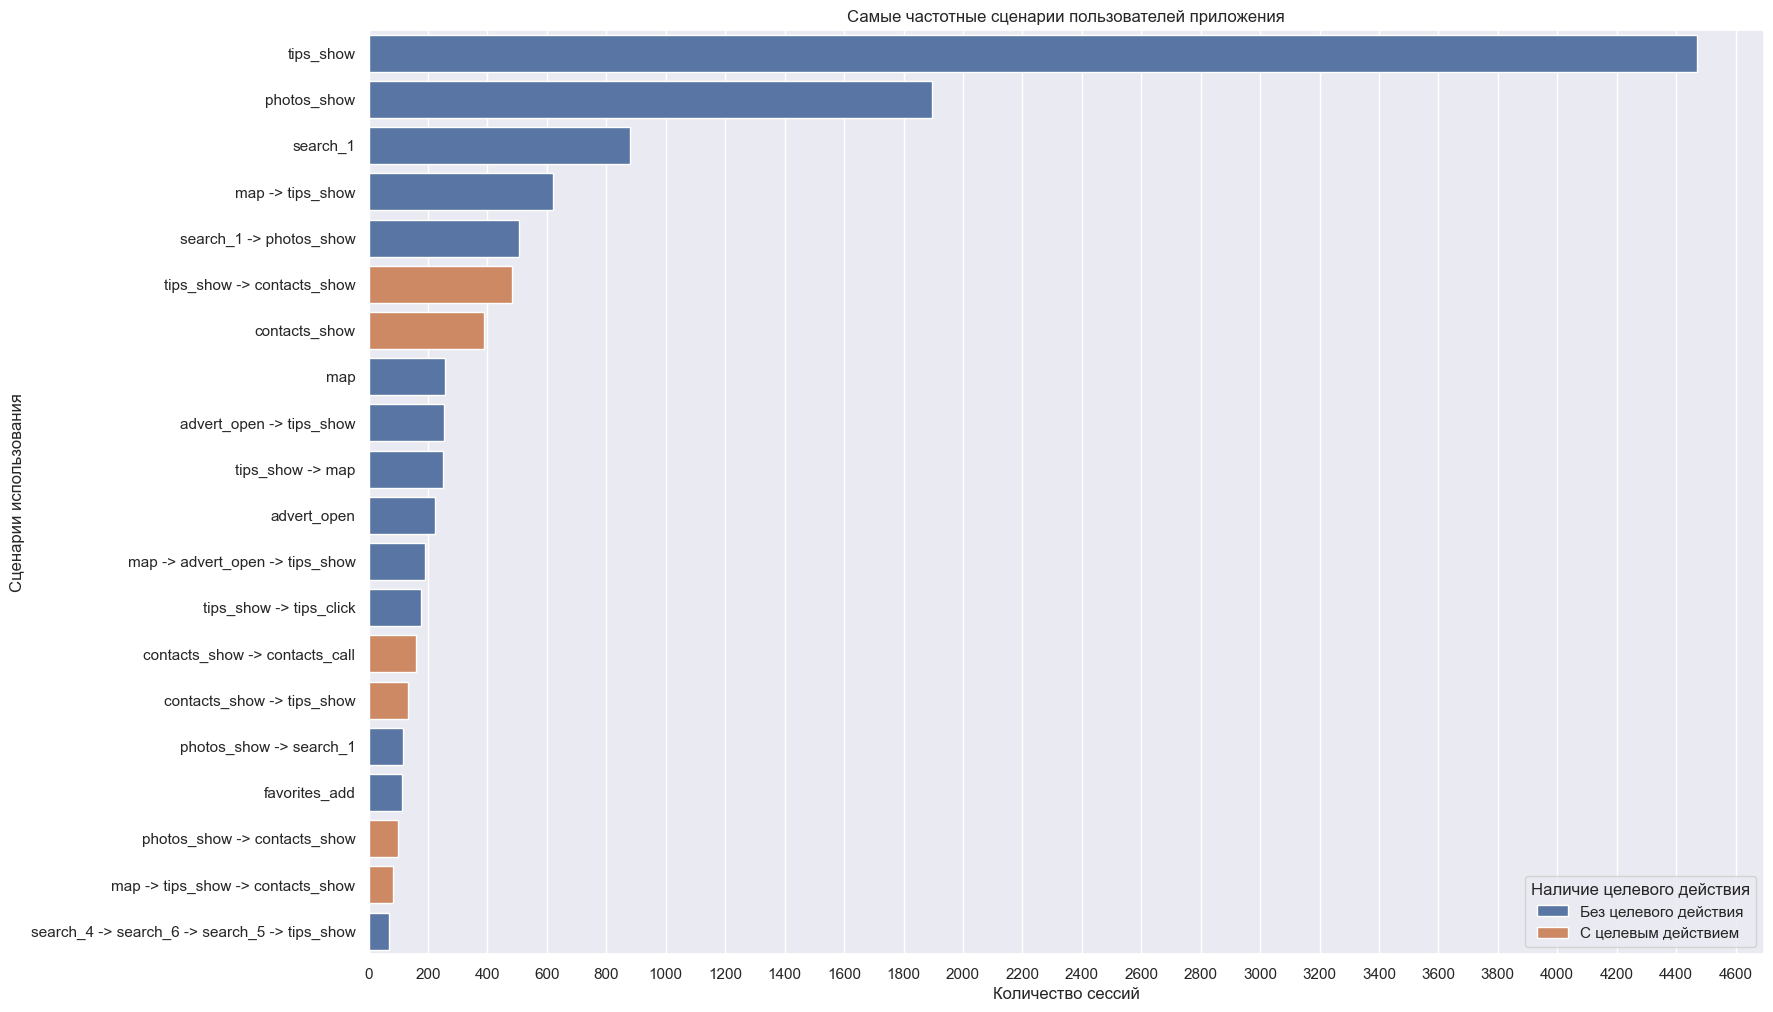

In [30]:
# подсчитаем и визуализируем частотность выявленных сценариев
# подсчитаем частотность сценариев и упорядочим их в порядке убывания
scenarios = sessions_per_id.groupby('event_name')['session_id'].agg('count').sort_values(ascending=False).reset_index()

# дополним датафрейм булевой меткой, включает ли сценарий целевое действие "contacts_show"
scenarios['target_action'] = scenarios['event_name'].str.contains('contacts_show')

# визуализируем топ-20 частотных сценариев и отметим те, которые включают целевое действие
figure = plt.figure(figsize=(18, 12))
ax = sns.barplot(
    data = scenarios.iloc[:20], # ограничим сценарии топ-20
    x = 'session_id', 
    y = 'event_name', 
    hue = 'target_action',
    dodge = False
)
ax.set_title('Самые частотные сценарии пользователей приложения')
ax.set_xlabel('Количество сессий')
ax.set_ylabel('Сценарии использования')
plt.xticks(np.arange(0, 4601, step=200)) # настроим более точные шкалы
handles, previous_labels = ax.get_legend_handles_labels()
ax.legend(title='Наличие целевого действия', handles=handles, labels=['Без целевого действия', 'С целевым действием'])

plt.show()

Как мы видим, что немалая часть сценариев проваливаются на одном действии, не достигая целевого действия. Мы не учитываем действие `tips_show` (>4400 случаев), поскольку оно происходит автоматически и не связано напрямую с их действиями. Так, чаще всего пользователи либо просматривают фото (около 1900 случаев), либо ищут что-то конкретное через основной поиск (>800 случаев), либо просматривают карту (>600 с последующими рекомендациями и >200 без рекомендаций). Однако важно то, что пользователи не останавливаются на данном этапе воронки и заканчивают сессию. Самые популярные сценарии с целевым действием `contacts_show` представлены либо демонстрацией рекомендаций с последующими контактами (>400 случаев), либо самим целевым действием `contacts_show` (около 400).  
Сфокусируемся на сценариях с целевым действием.

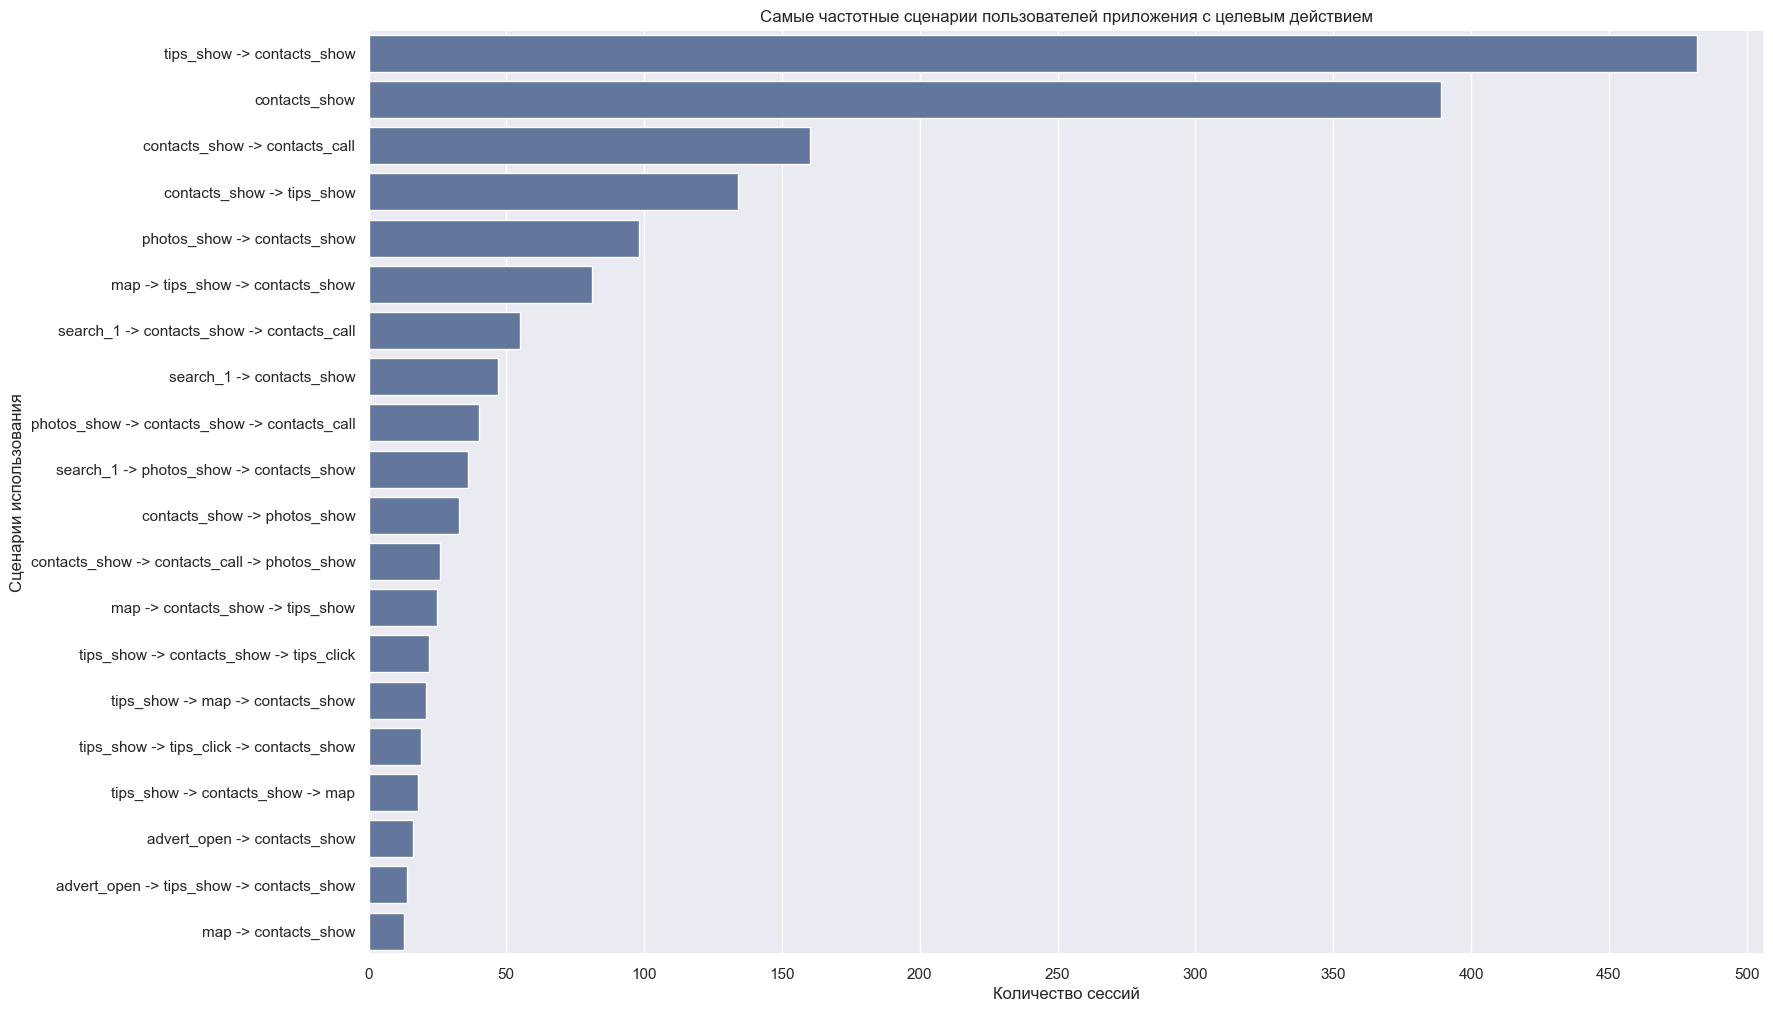

In [31]:
# визуализируем сценарии только с целевым действием
figure = plt.figure(figsize=(18, 12))
ax = sns.barplot(
    data = scenarios[scenarios['target_action'] == True].iloc[:20], # ограничим сценарии топ-20
    x = 'session_id', 
    y = 'event_name',
    color = '#5975a4'
)
ax.set_title('Самые частотные сценарии пользователей приложения с целевым действием')
ax.set_xlabel('Количество сессий')
ax.set_ylabel('Сценарии использования')
plt.xticks(np.arange(0, 501, step=50)) # настроим более точные шкалы

plt.show()

Среди сценариев с целевым действием можно выделить следующиие оформленные в целый путь пользовательские пути: демонстрация рекомендаций с последующим открытием контактов (>450), просмотр фотографий с открытием контактов (около 100) и просмотр карты с дальнейшей рекомендацией и открытием контактов (около 80). Остальные сценарии либо не достигают достаточного количества случаев, либо не включают целевое действие как конечный этап. Учитывая то, что сценарии с 1 этапом маловероятны и им предшествует предварительная сессия без целевого действия, а также то, что большая часть пользователей по диаграмме Санкея начинают с поиска, карты или рекомендаций, то сфокусируемся далее на следующих сценариях: 
- рекомендации - контакты (`tips_show -> contacts_show`),
- просмотр фотографий - контакты (`photos_show -> contacts_show`),
- просмотр карты - рекомендации - контакты (`map -> tips_show -> contacts_show`),
- поиск - просмотр фото - добавление в избранное - контакты (`search_1 -> photos_show -> favorites_add -> contacts_show`).
Для подсчета воронки по выбранным сценариям объявим функцию, которая автоматически будет создавать воронку-датафрейм для дальнейшей визуализации.

In [32]:
# объявим функцию для получения воронки по заданному сценарию
def get_funnel(data, scenario=[]):
    
    """Функция создания новых датафреймов-воронок на основе исходных данных и сценария действий

    Входящие аргументы:
        data (pd.DataFrame): исходная таблица.
        scenario (list): упорядоченный список действий сценария
    Возвращает:
        funnel (pd.DataFrame): датафрейм-воронка.
    """
    
    # зададим списки для количества пользователей на каждом шаге и их идентификаторов
    # заполним списки для первого шага воронки
    uid_cnt=[data[data['event_name']==scenario[0]]['user_id'].nunique()]
    step_ids=(data[data['event_name']==scenario[0]]['user_id'].drop_duplicates()).to_list()
    
    # через цикл отфильтруем пользователей для каждого шага и высчитаем их количество
    for step in scenario[1:]:
        step_ids = data[(data['user_id'].isin(step_ids)) & (data['event_name']==step)]['user_id'].drop_duplicates()
        uid_cnt.append(step_ids.nunique())
    
    # создаем воронку-датафрейм с готовыми подсчетами для каждого шага
    funnel = pd.DataFrame(data = {'step': scenario, 'uid_cnt': uid_cnt})
    
    # возвращаем готовую воронку-датафрейм
    return funnel

Теперь воспользуемся функцией и визуализируем полученные воронки.

In [33]:
# получим воронку по сценарию "tips_show -> contacts_show"
funnel_1 = get_funnel(data, ['tips_show', 'contacts_show'])

# визуализиируем воронку
# создадим фигуру
fig = go.Figure()

# поочередно дабвим визуализацию каждой воронки
fig.add_trace(go.Funnel(
    y = funnel_1['step'],
    x = funnel_1['uid_cnt']))

fig.update_layout(
    title = 'Воронка по сценарию "photos_show -> contacts_show"',
    )

fig.show()

Как мы видим, ото всего числа пользователей, которым демонстрировались рекомендации(2801), в просмотр контактов доходит немногим больше 18% (516). Воронку по данному сценарию можно оценить как хорошую, а влияние рекомендаций на просмотр контактов - как достаточно мотивирующее, однако процент конверсии в целевое действие можно повысить, поэтому в данном отношении рекомендуется пересмотреть алгоритмы и принципы, по которым появляются и отбираются рекомендации.  
Посмотрим на воронку для сценария `photos_show -> contacts_show`.

In [34]:
# получим воронку по сценарию "photos_show -> contacts_show"
funnel_2 = get_funnel(data, ['photos_show', 'contacts_show'])

# визуализиируем воронку
# создадим фигуру
fig = go.Figure()

# поочередно дабвим визуализацию каждой воронки
fig.add_trace(go.Funnel(
    y = funnel_2['step'],
    x = funnel_2['uid_cnt']))

fig.update_layout(
    title = 'Воронка по сценарию "photos_show -> contacts_show"',
    )

fig.show()

Как мы видим, фотографии хорошо конвертируют пользователей в просмотр контактов: около трети(339) от 1095 посмотревших открывают контакты. И действительно, фотографии намного лучше доносят до пользователя характеристики выставляемой вещи.  
Посмотрим, как обстоят дела с картой.

In [35]:
# получим воронку по сценарию "map -> tips_show -> contacts_show"
funnel_3 = get_funnel(data, ['map', 'tips_show', 'contacts_show'])

# визуализиируем воронку
# создадим фигуру
fig = go.Figure()

# поочередно дабвим визуализацию каждой воронки
fig.add_trace(go.Funnel(
    y = funnel_3['step'],
    x = funnel_3['uid_cnt']))

fig.update_layout(
    title = 'Воронка по сценарию "map -> tips_show -> contacts_show"',
    )

fig.show()

Карта достаточно удобный инструмент и часто выступает первым шагом в сценариях. В сценарии `map -> tips_show -> contacts_show` с карты начинают 1456 пользователей, после чего 1352 (около 93%) пользователя получают рекомендацию, однако только пятая часть (275) просматривает контакты, что дполнительно свидетельствует о слабости рекомендательных алгритмов, особенно по использованию карты.  
Ознакомимся с более крупным сценарием `search_1 -> photos_show -> favorites_add -> contacts_show`.

In [36]:
# получим воронку по сценарию "search_1 -> photos_show -> favorites_add -> contacts_show"
funnel_4 = get_funnel(data, ['search_1', 'photos_show', 'favorites_add', 'contacts_show'])

# визуализиируем воронку
# создадим фигуру
fig = go.Figure()

# поочередно дабвим визуализацию каждой воронки
fig.add_trace(go.Funnel(
    y = funnel_4['step'],
    x = funnel_4['uid_cnt']))

fig.update_layout(
    title = 'Воронка по сценарию "search_1 -> photos_show -> favorites_add -> contacts_show"',
    )

fig.show()

Сценарий особенно `search_1 -> photos_show -> favorites_add -> contacts_show` интересен тем, что влючает событие `favorites_add`, которое как правило благотворно влияет на вовлеченность пользователей в приложении. Относительно воронки с базового поиска начинают 787 человек, и находит что-то достойное внимания каждый 4-ый (около 82%), однако добавляют в избранное по данному сценарию только 134 человека (20%), что представляет собой слишком сильное сужение воронки, особенно если учитывать, что от избранного в просмотр контактов доходят около 36%. Создается впечатление, что функция избранного недостаточно представлена в пользовательском пути просмотра объявлений, что подтверждается и относительно слабой частотностью по сравнению с другими действиями. Оптимальным вариантом улучшения по данному сценарию будет пересмотреть шорткаты к функции добавления в избранное. Например, добавить кнопку в виде сердца около объявления и их фотографий.

### Выводы
На данном этапе был успешно проведен исследовательский анализ данных. В ходе данного этапа были выявлены следующие особенности:
- на пользователя безотносительно сессий приходится от 5 до 17 действий с медианой в 9 действий,
- в ходе выявления распределения длительности пауз между событиями был выявлен оптимальный тайм-аут в 7 минут, что составляет 1,5 квартиля от 75-ого процентиля,
- с учетом выявленного тайм-аута всего сессий за рассматриваемый период 14167,
- большая часть сессий ограничена 1 действием, а большая часть пользователей имеют за сессию до 6 событий, что демонстрирует достаточно короткий цикл в типичной сессии,
- сессии как по дням, так и по неделям имеют на первой неделе показатель ниже среднего (около 2700), однако на вторую неделю и далее резко доходит до уровня в 3500 сессий, что говорит либо о сильной компании по привлечению, либо о слабом пользовательском опыте, приведшем к низкому количеству сессий на 41 неделе,
- схожий тренд имеют и метрики MAU и WAU: первая неделя отмечается низкими показателями использования приложения (около 200 за день и 1100 за месяц), однако на второй неделе и далее метрики возрастают и достигают пика к третьей (около 350 за день или 1550 за неделю),
- по диаграмме Санкея можно утверждать, что чаще всего пользователи начинают свой путь в приложении с поиска, рекомендаций или карты, а затем уже наблюдается сужение воронки, вследствие чего до целевого действия доходит намного меньше пользователей,
- среди всех сценариев использования наблюдается преобладание сценариев, заканчивающихся на первом же действии (просмотр фото или карты, а также демонстрация "тупиковых" рекомендаций), что свидетельствует о слабой пользовательском пути приложения,
- среди сценариев с достижением целевого действия особо часто встречаются просмотр контактов с предварительной демонстрацией рекомендаций и просмотром фото;
- воронки по сценариям с целевым действием выявили неудовлетворительную работу рекомендательных алгоритмов в особенности при взаимодействии с картой, а также слабое включение функции добавления в избранное относительно поискового пользовательского пути при умеренной конверсии в целевое действие.
Результаты исследовательского анализа данных, а именно слабая конверсия в целевое действие и более высокая при предварительных действиях в сценарии, свидетельствует о том, что для улучшения пользовательского опыта в приложении требуется выявить события, которые увеличивают просмотр контактов, а также то, как целевое действие связано с прочими событиями в сессиях.

___________________________________________________________________

## Основные вопросы исследования
На данном этапе нам необходимо ответить на основные вопросы исследования, а именно:
- какие сценарии/паттерны приводят к просмотру контактов,
- построить воронки по основным сценариям,
- как часто происходят различные виды событий у пользователей, которые смотрят контакты,
- как часто происходят различные виды событий у пользователей, которые не смотрят контакты.

Если воронки основных сценариев с целевым действием мы уже построили на этапе исследовательского анализа данных, а также выявили благотворное влияние предварительных действий на конверсию в целевое действие, то потребуется выявить влияние различных событий на конверсию в целевое действие.  
Начнем с подготовки данных. Отметим пользователей, которые просматривали контакты в столбце `target`.

In [37]:
# посчитаем количесвто достижений целевого действия у всех пользователей
events_pivot = data.pivot_table(
    index = 'event_name',
    columns = 'user_id',
    values = 'session_id',
    aggfunc = 'count'
).T.fillna(0).reset_index()

# отметим пользователей, которые просматривали хоть раз контакты в новом столбце "target"
events_pivot['target'] = events_pivot['contacts_show'] > 0

# добавим столбец c метками к основному датафрейму
data = data.merge(events_pivot[['user_id', 'target']], how='left', on='user_id')

# проверим результат
data.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id  source  session_id    day  week  \
0  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41   
1  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41   
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41   
3  020292ab-89bc-4156-9acf-68bc2783f894   other           1  10.07    41   
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex           2  10.07    41   

   target  
0   False  
1   False  
2   False  
3   False  
4   False

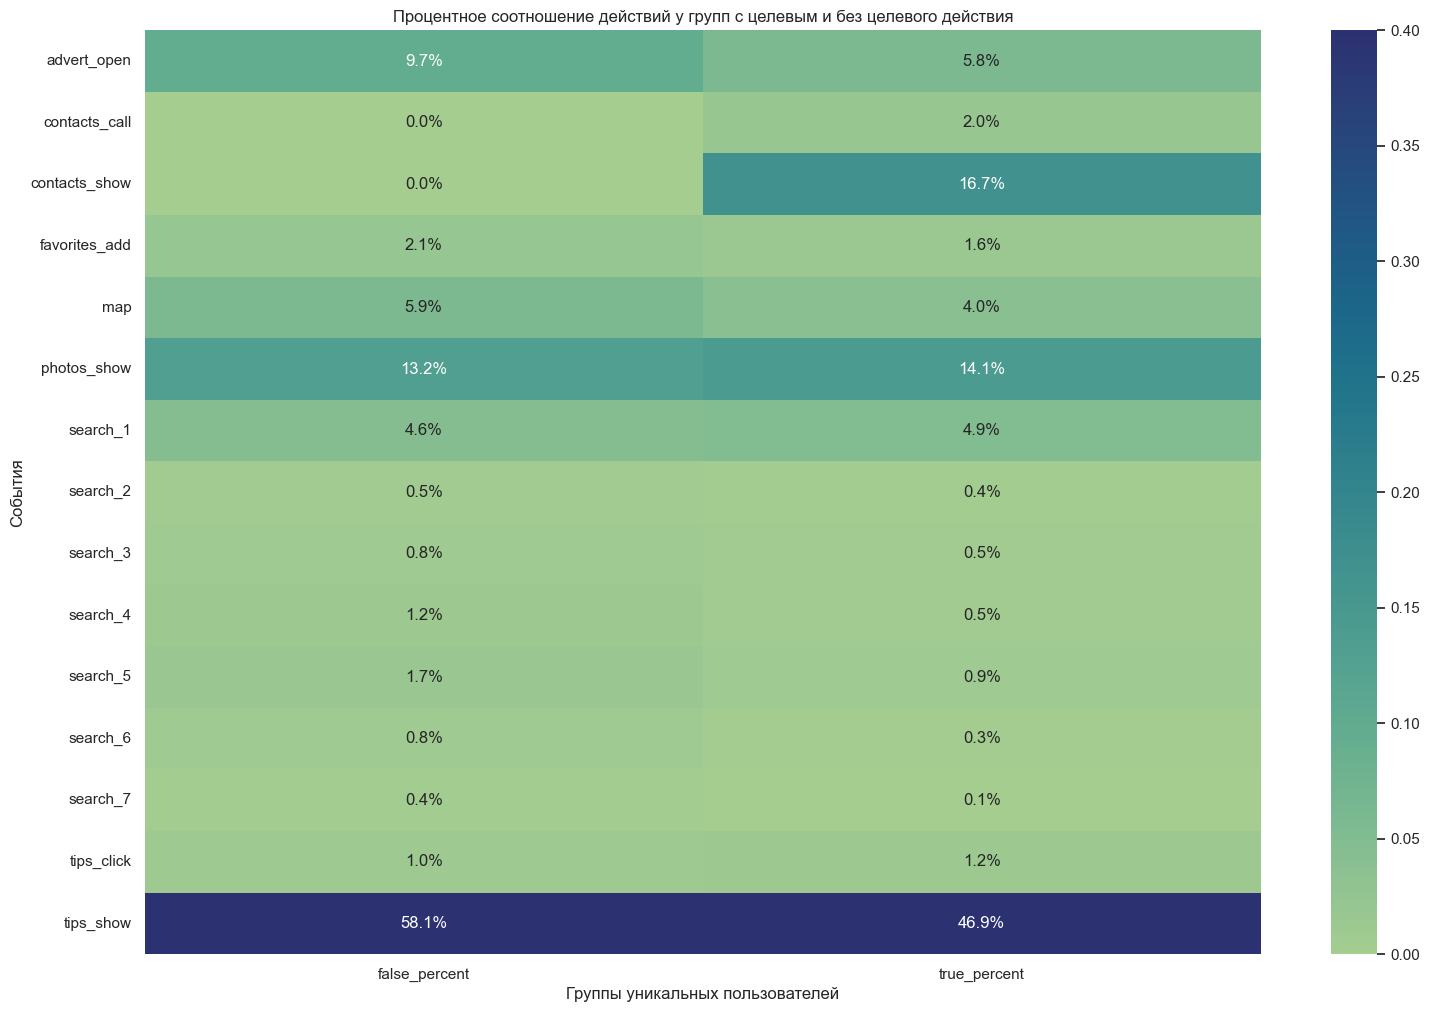

In [38]:
# создадим сводную таблицу с количеством событий для целевой и нецелевой группы
target_data = data.pivot_table(
    index = 'event_name',
    columns = 'target',
    values = 'user_id',
    aggfunc = 'count'
).fillna(0).reset_index()

# добавим столбцы с процентным соотношением событий в обеих группах
target_data['false_percent'] = target_data[False] / target_data[False].sum()
target_data['true_percent'] = target_data[True] / target_data[True].sum()

# приведем столбцы к формату с одним знаком после точки
#target_data = target_data.style.format({'false_percent':'{:.1f}', 'true_percent':'{:.1f}'})

# веренем датафрейм из формата Styler
#target_data = target_data.data

# отфильтруем таблицу
target_data = target_data[['event_name', 'false_percent', 'true_percent']].set_index('event_name')

# визуализируем таблицу как heatmap
figure = plt.figure(figsize=(18, 12))
ax = sns.heatmap(target_data, annot=True, cmap='crest', fmt='.1%', vmax=0.4)
ax.set_title('Процентное соотношение действий у групп с целевым и без целевого действия')
ax.set_xlabel('Группы уникальных пользователей')
ax.set_ylabel('События')

plt.show()

Как мы видим, пользователи, которые просматривали контакты, меньше просматривают карту и сами карточки объявлений, зато соразмерно соотношение просмотра фотографий и основного поиска. Отдельно стоит отметить, что пользователи без целевого действия застревают в поиске: хоть у обеих групп схожий процент `search_1`, прочие виды поиска у целевой группы выражены слабее, чем у нецелевой. Вероятнее всего, виды поиска представляют собой различные фильтры, и целевая группа ими пользуется не так активно. Можно сказать, что целевая группа просматривает контакты, поскольку ищет товары более осознано и не медлит с просмотром контактов, а нецелевая группа, наоборот, больше распыляется на прочие активности, на что указывает и более высокий процент добавления объявлений в избранное, просмотра карты и числа демонстраций рекомендаций, однако не стоит исключать и то, что различные инструменты приложения (карта, детализация поиска, рекомендации) сбивают пользователей от конверсии в целевое действие. Здесь стоит проверить рекомендательные алгоритмы и то, насколько хорошо, приложение попадает в запросы пользователей. Дополнительно отметим, что группа с целевым действием показывает себя как более самостоятельную в том смысле, что она меньше полагается на поиск, но больше на просмотр фотографий, также она меньше открывает карточки и добавляет в избранное, будто заранее значет, что и где искать.
Однако какие события приводят к конверсии в целевое действие, а какие, наоборот, препятствуют ей? Построим динамику действий, держа в уме тот факт, что количество сессий, а также дневные и недельные метрики активности имеют низкие показатели в первую неделю рассматриваемого периода, а также проседание в последней.

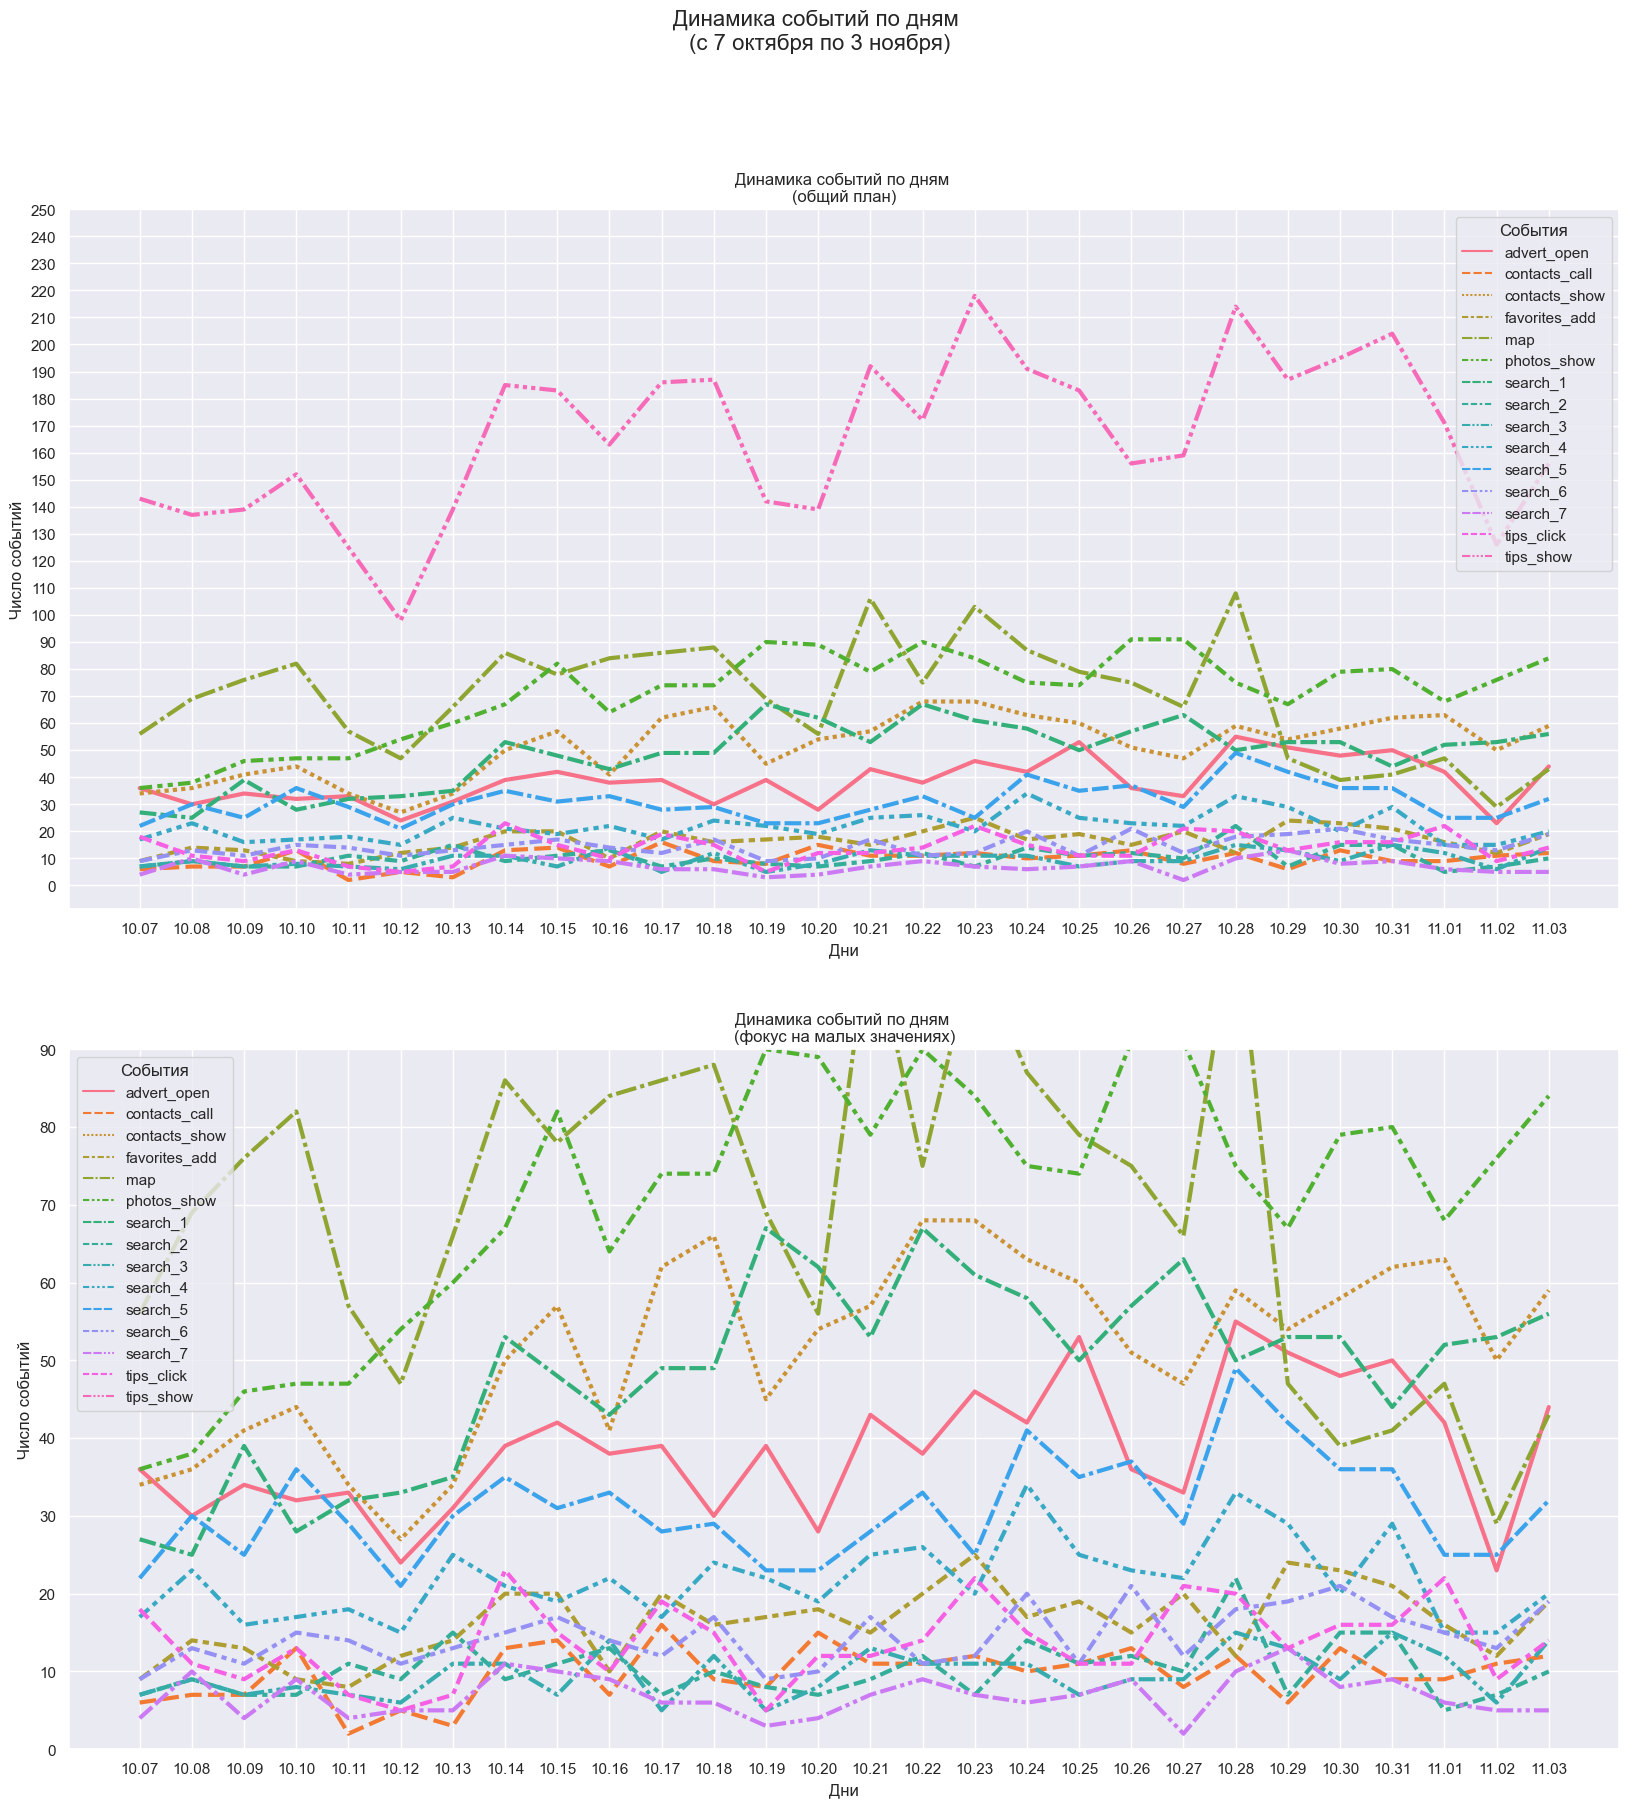

In [39]:
# построим аналогичную сводную таблицу, но уже в динамике за представленный период по дням
target_day_dynamics = data.pivot_table(
    index = 'day',
    columns = 'event_name',
    values = 'user_id',
    aggfunc = 'nunique'
).fillna(0)

# зададим размер для общей области
figure = plt.figure(figsize=(20, 20))
figure.suptitle('Динамика событий по дням \n(с 7 октября по 3 ноября)', fontsize=16)

# визуализируем общий план
figure = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(data=target_day_dynamics, linewidth = 3)
ax1.set_title('Динамика событий по дням \n(общий план)')
ax1.set_xlabel('Дни')
ax1.set_ylabel('Число событий')
plt.yticks(np.arange(0, 251, step=10)) # настроим более точные шкалы
leg = ax1.legend() # перенесем легенду в отдельную переменную для обращения
for line in leg.get_lines(): # через цикл изменим толщину линий легенды
    line.set_linewidth(4.0)
ax1.legend(title='События')

# визуализируем фокус на малых значениях
figure = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(data=target_day_dynamics, linewidth = 3)
ax2.set_title('Динамика событий по дням \n(фокус на малых значениях)')
ax2.set_xlabel('Дни')
ax2.set_ylabel('Число событий')
plt.yticks(np.arange(0, 251, step=10)) # настроим более точные шкалы
plt.ylim(0, 90) 
leg = ax2.legend() # перенесем легенду в отдельную переменную для обращения
for line in leg.get_lines(): # через цикл изменим толщину линий легенды
    line.set_linewidth(4.0)
ax2.legend(title='События')

plt.show()

Самое частое действие - показ рекомендаций `tips_show`. Это действие во многом определяет активность пользователей в приложении и его тренд повторяет метрики активных пользователей и числа сессий. Значит, рекомендации положительно влияют на активность пользователей, хотя, как мы выяснили, и слабо ведут к целевому действию. Прочие действия в целом повторяют тренд активности пользователей, однако мы можем заметить, что основной поиск `search_1` слабо отражает общий тренд и как бы противоречит прочим действиям: часто там, где основные действия падают, поиск либо не меняется, либо, наоборот, начинает двинаться в противоположном тренде. Это дополнительное указание на то, что поиск не удовлетворяет ожидания пользователей.  
Дополним динамику неделями.

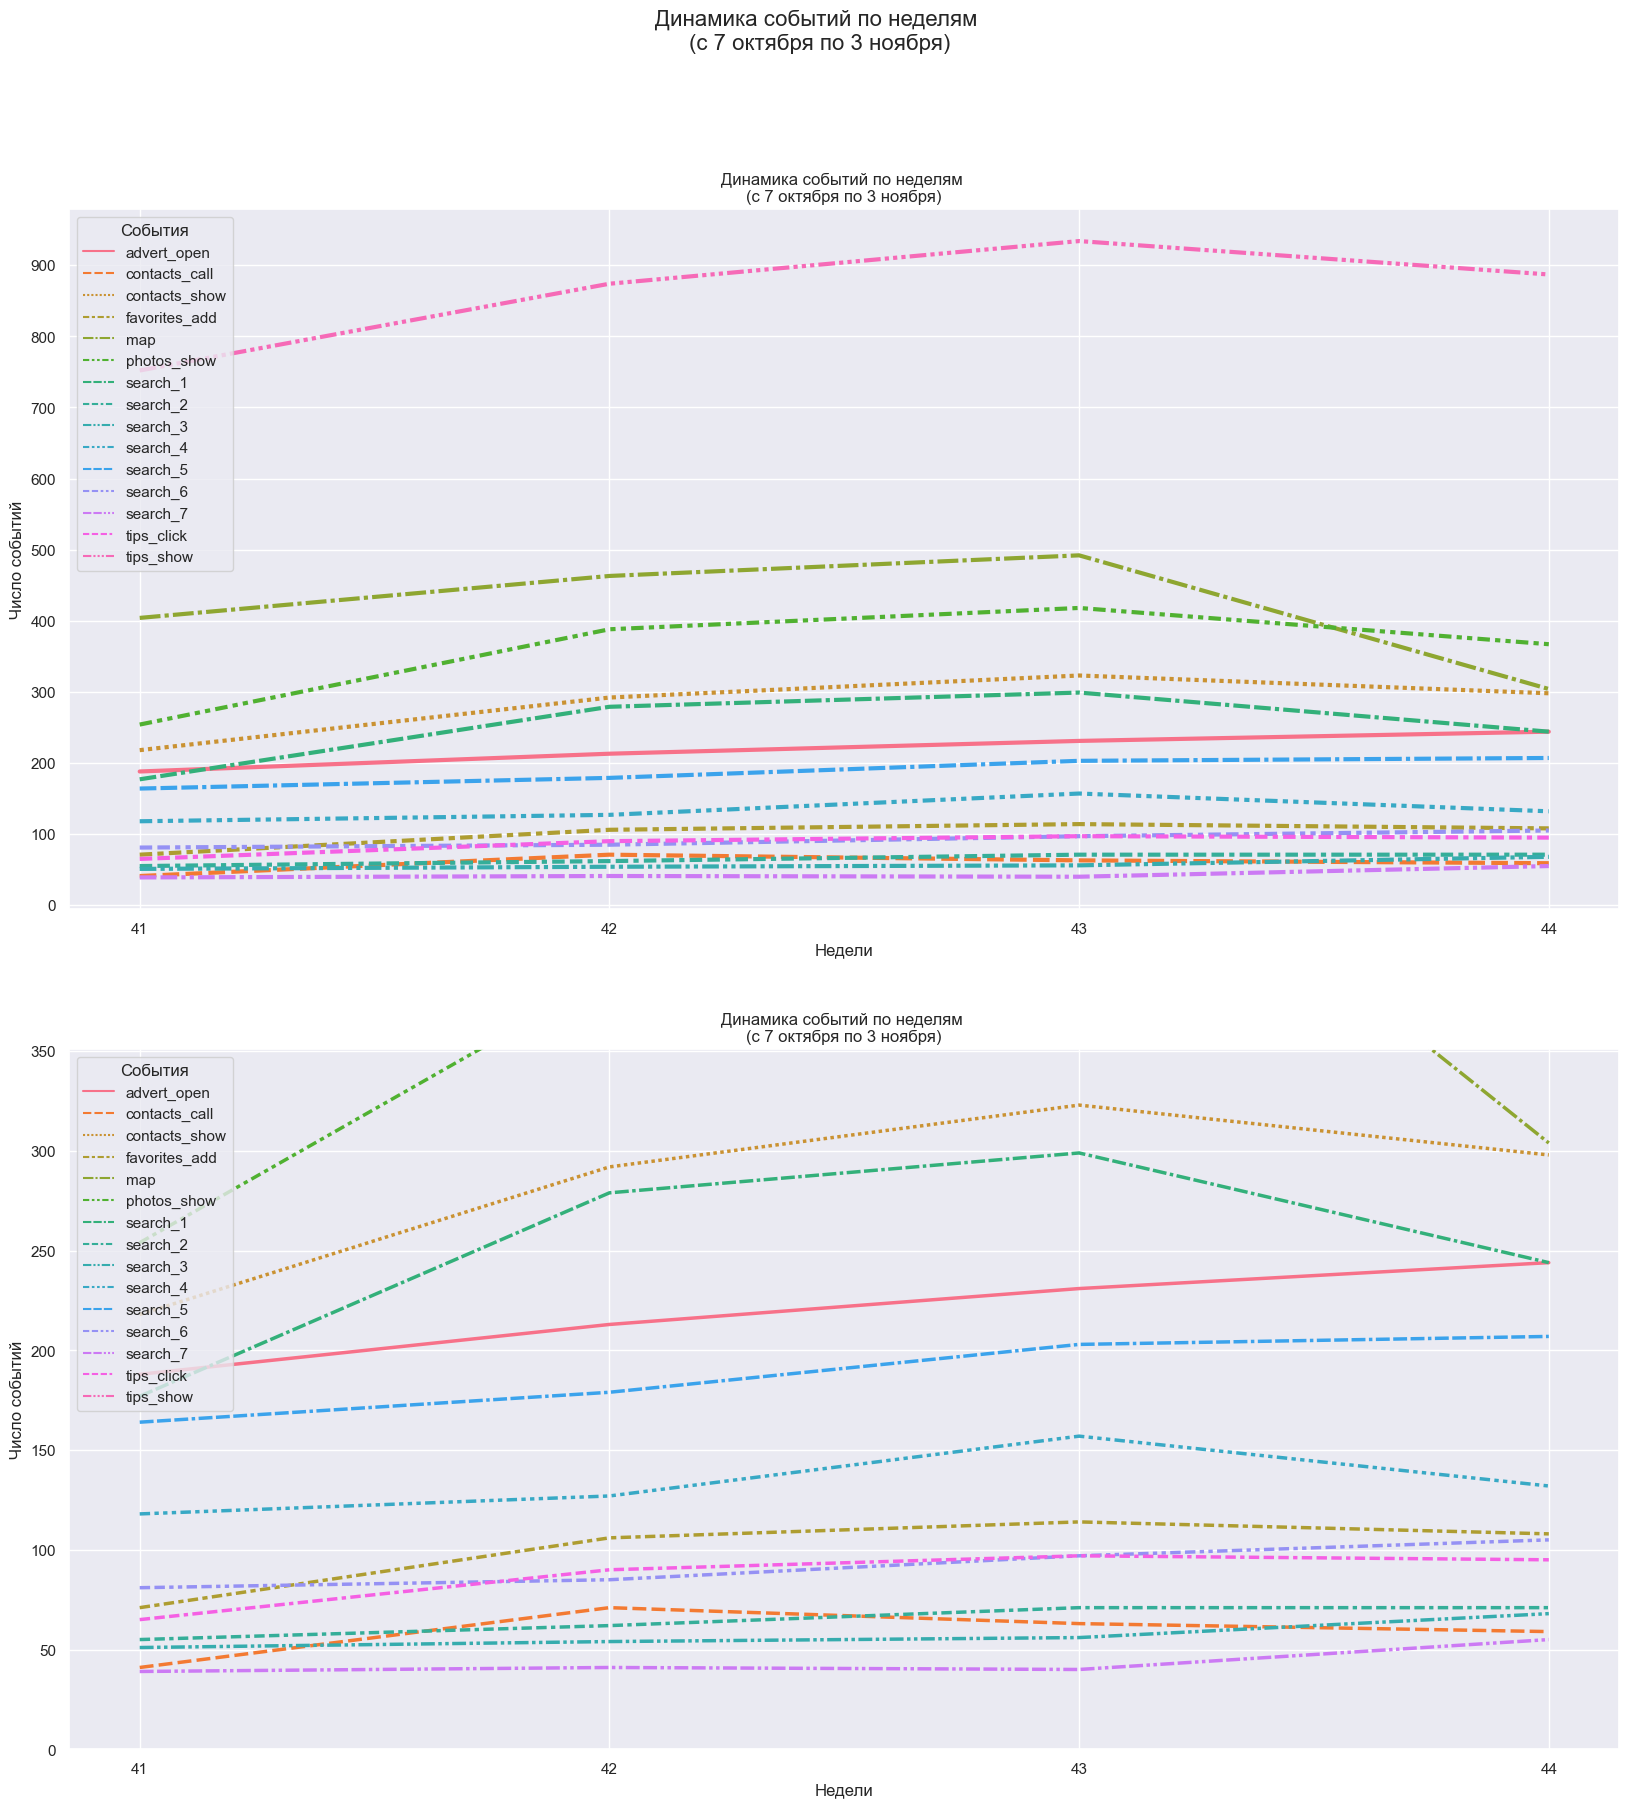

In [40]:
# построим аналогичную сводную таблицу в динамике за представленный период, но уже по неделям
target_week_dynamics = data.pivot_table(
    index = 'week',
    columns = 'event_name',
    values = 'user_id',
    aggfunc = 'nunique'
).fillna(0)

# создаем массив numpy в индексе в обход ошибки совместимости seaborn и numpy
target_week_dynamics.index = np.array(target_week_dynamics.index, dtype=int)

# зададим размер для общей области
figure = plt.figure(figsize=(20, 20))
figure.suptitle('Динамика событий по неделям \n(с 7 октября по 3 ноября)', fontsize=16)

# визуализируем общий план
figure = plt.subplot(2, 1, 1)
ax3 = sns.lineplot(data=target_week_dynamics, linewidth = 3)
ax3.set_title('Динамика событий по неделям \n(с 7 октября по 3 ноября)')
ax3.set_xlabel('Недели')
ax3.set_ylabel('Число событий')
plt.yticks(np.arange(0, 901, step=100)) # настроим более точные шкалы
plt.xticks(np.arange(41, 45, step=1)) # настроим шкалы, чтобы  отменить интерполяцию
leg = ax3.legend() # перенесем легенду в отдельную переменную для обращения
for line in leg.get_lines(): # через цикл изменим толщину линий легенды
    line.set_linewidth(4.0)
ax3.legend(title='События', loc='upper left')

# визуализируем фокус на малых значениях
figure = plt.subplot(2, 1, 2)
ax2 = sns.lineplot(data=target_week_dynamics, linewidth = 2.5)
ax2.set_title('Динамика событий по неделям \n(с 7 октября по 3 ноября)')
ax2.set_xlabel('Недели')
ax2.set_ylabel('Число событий')
plt.yticks(np.arange(0, 351, step=50)) # настроим более точные шкалы
plt.ylim(0, 351) 
plt.xticks(np.arange(41, 45, step=1)) # настроим шкалы, чтобы  отменить интерполяцию
leg = ax2.legend() # перенесем легенду в отдельную переменную для обращения
for line in leg.get_lines(): # через цикл изменим толщину линий легенды
    line.set_linewidth(4.0)
ax2.legend(title='События', loc='upper left')

plt.show()

В понедельной динамике мы наблюдаем на последней неделе спад основных действий, включая целевое. Особенно примечательно то, что сильнее прочих падают просмотры карты, что как бы тянет за собой прочие показатели действий. В купе с тем, что основной поиск не улучшает пользовательский опыт, падение просмотров карты исключает дополнительный канал выявления релевантных предложений, а следовательно и конверсию в просмотр контактов. Также следует отметить и восходящий тренд просмотра карточек, что также свидетельствует о слабой таргетированности предложений, поскольку данный тренд не отражает прочие тренды видов действий. Посмотрим, как действия коррелируеют между собой.

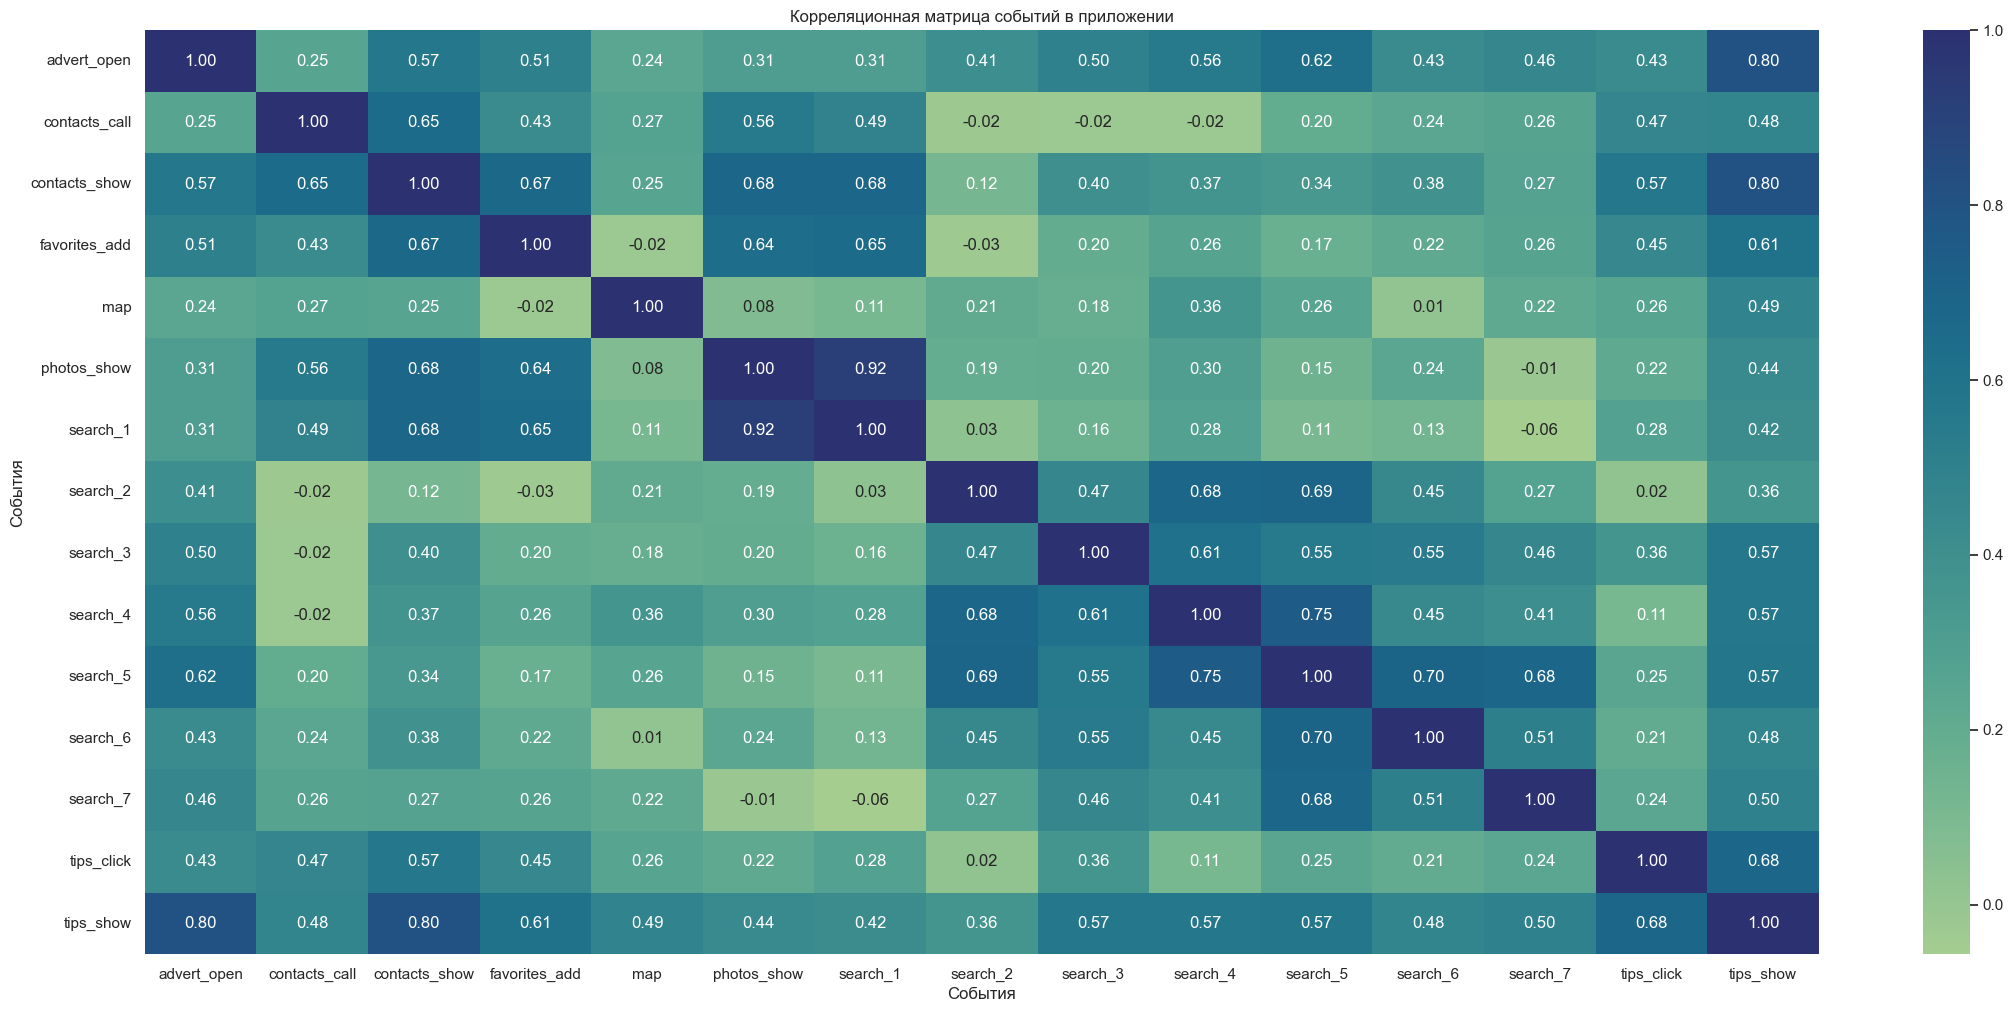

In [41]:
# визуализируем корреляцию как heatmap
figure = plt.figure(figsize=(27, 12))
ax = sns.heatmap(target_day_dynamics.corr(), annot=True, cmap='crest', fmt='.2f')
ax.set_title('Корреляционная матрица событий в приложении')
ax.set_xlabel('События')
ax.set_ylabel('События')
plt.xticks(rotation=0)

plt.show()

Мы не наблюдаем достаточно сильной обратной корреляции, поэтому вряд ли какое-то действие прямо противоречит другому, однако важно учесть, что околонулевая корреляция свидетельствует о недостаточно продуманном CJM, т.к. не все действия ведут к цели. Так, мы видим, что детализированный поиск `search_2` и `search_7` имеют слабую связь, а если учитывать прочие действия (например, слабая связь просмотра фото и карты, которые способствуют конверсии, с различными видами поиска), то мы можем убедиться в слабой проработке поиковых функций относительно пользовательского пути к целевому действию просмотра контактов. В этом отношении достаточно высокую корреляцию демонстрирует добавление в избранное (0,67), что подтверждается воронкой по сценарию `search_1 -> photos_show -> favorites_add -> contacts_show`, хотя, как мы знаем, нецелевые пользователи чаще прибегают к этой функции. Еще большую корреляцию мы наблюдаем у просмотра фотографий и основного поиска (`search_1`), что сразу же показывает, как поиск ведет пользователей к ознакомлению с найденным объявлением. Такую же взаимосвязь действий необходимо обеспечить и для прочих, включая поисковые действия.

### Выводы
На данном этапе мы выявили следующее:
- целевые пользователи реже прочих добавляют объявления в избранное, просматривают рекомендации и карту, но чаще смотрят фотографии, используют базовый поиск и кликают на рекомендации,
- нецелевые пользователи чаще пользуются расширенным функционалом поиска, а также чаще добавляют объявления в избранное,
- несмотря на относительно слабое ведение промежуточных действий к конверсии, такие действия, как демонстрация рекомендаций и просмотр карты прямо отражают пользовательскую активность, а значит, требуют более тесного включения в пользовательский путь с целевым действием,
- при спадах активности пользователей основным действием выступает поиск, который не удовлетворяет пользовательские ожидания, что ведет к прерыванию сессии,
- просмотр карты выступает альтернативой основному поиску и сильно влияет на сессии пользователей,
- рекомендации не отражают общий тренд действий за рассматриваемый период, поэтому их таргетированность следует пересмотреть,
- промежуточные действия в сессиях не противоречат выполнению целевого действия, однако у поисковых функций слабая связь с прочими действиями, что ведет к большим потерям по ходу воронки, т.к. поисковая активность одна из базовых в клиентском пути.
___________________________

## Проверка статистических гипотез
Заказчик в дополнение к основным вопросам исследования также предложил продуктовую гипотезу:  

***Конверсия в просмотры контактов различается у групп `tips_show` и `tips_click`***

Проверим данную гипотезу. Для начала подготовим данные, выделив пользователей с маркирующими событиями, учитывая то, что пользователи нажавшие на рекомендацию предварительно ее увидели, поэтому часть пользователей будет пересекаться в группах.

In [42]:
# отфильтруем данные по интересующим нас действиям, получив id пользователей в группе "tips_show"
common_group = data[data['event_name']=='tips_show']['user_id'].drop_duplicates().reset_index(drop=True)

# узнаем объем выборки
common_group.count()

2801

Объем тестируемой выборки составляет 2801 уникальный пользователь. Теперь отфильтруем данные по выявленным пользователям.

In [43]:
# отфильтруем данные выделенными для теста пользователями
test_data = data[
    (data['user_id'].isin(common_group)) &
    (data['event_name'] == 'tips_click') |
    (data['event_name'] == 'tips_show')
].reset_index(drop=True).drop_duplicates(subset=['user_id', 'event_name'])

# проверим точность фильтрации
test_data['user_id'].nunique()

2801

После того, как мы отфильтровали данные, на их основе мы выделим группы.

In [44]:
# выделим пользователей с событием и без события  "tips_click"
tips_click_group = test_data[test_data['event_name']=='tips_click']['user_id'].drop_duplicates().to_frame()
tips_show_group = test_data[~test_data['user_id'].isin(tips_click_group['user_id'])]['user_id'].drop_duplicates().to_frame()

# проверим правильность разделения пользователей на группы
print(
    f'Группа "tips_click": {tips_click_group["user_id"].nunique()}   Группа "tips_show": {tips_show_group["user_id"].nunique()}   Всего: {tips_click_group["user_id"].nunique()+tips_show_group["user_id"].nunique()}')

Группа "tips_click": 297   Группа "tips_show": 2504   Всего: 2801


Как мы видим, выявлено 297 пользователей, которые нажали на рекомендации, и 2504 пользавателя, которым только они были показаны. Всего 2801 пользователь, что соответствует изначальной выборке, а значит мы поделили пользователей на группы верно. Теперь добавим метки пользователям и объединим их в один датафрейм.

In [45]:
# добавим метку группы в каждом датафрейме
tips_show_group['group'] = 'tips_show'
tips_click_group['group'] = 'tips_click'

# объединим датафреймы
test_groups = pd.concat([tips_show_group, tips_click_group]).reset_index(drop=True)

# проверим результат
test_groups.head()

user_id      group
0  020292ab-89bc-4156-9acf-68bc2783f894  tips_show
1  f32e1e2a-3027-4693-b793-b7b3ff274439  tips_show
2  62aa104f-592d-4ccb-8226-2ba0e719ded5  tips_show
3  57321726-5d66-4d51-84f4-c797c35dcf2b  tips_show
4  e5e66067-ea26-4c33-96bb-e36f645ba3aa  tips_show

Теперь, когда группы сформированы, добавим целевые действия к каждому id, если оно происходило.

In [46]:
# подготовим уникальных пользователей с целевым действием
target_ids = data[data['event_name']=='contacts_show'][['user_id', 'target']].drop_duplicates(subset=['user_id'])

# объединим группы с целевыми действиями
test_groups = test_groups.merge(
    right = target_ids, 
    how = 'left', 
    on = 'user_id'
).fillna(False)

# проверим результат
test_groups.head()

user_id      group  target
0  020292ab-89bc-4156-9acf-68bc2783f894  tips_show   False
1  f32e1e2a-3027-4693-b793-b7b3ff274439  tips_show   False
2  62aa104f-592d-4ccb-8226-2ba0e719ded5  tips_show   False
3  57321726-5d66-4d51-84f4-c797c35dcf2b  tips_show   False
4  e5e66067-ea26-4c33-96bb-e36f645ba3aa  tips_show   False

После подготовки данных нам остается только создадть сводную таблицу с показателями в целевое действие.

In [47]:
# создадим сводную таблицу для теста
test_groups = (test_groups.
               groupby('group')[['user_id', 'target']].
               agg({'user_id': 'count', 'target': 'sum'}).
               rename(columns={'user_id': 'total'}).T
              )
# проверим результат
test_groups

group   tips_click  tips_show
total          297       2504
target          91        425

Теперь, когда данные по конверсии тестируемых групп в целевое событие просмотра контактов готовы, выберем критерий для статистического теста. Поскольку мы имеем дело с пропорцией, то оптимальным выбором критерия будет **z-критерий**.    
Z-критерий высчитывается по следующей формуле:

$\LARGE Z \approx \frac{(P_1-P_2)-(\pi_1-\pi_2)}{\sqrt{P(1-P)(1/n_1+1/n_2)}}$

Поскольку нам предстоит тестировать дополнительную гипотезу далее, объявим функцию, которая будет принимать датафрейм с шагами воронок и группами, а также установим уровень статитстической значимости $\alpha = 0,5$.

In [48]:
# объявим функцию
def get_z(df, cv_step='', groups=[], alpha=0.5):
    """
    Расчет p-value по z-статистике
    
    Входящие аргументы:
        df (dataframe): датафрейм с показателями конверсии каждого шага воронки.
        cv_step (str): строка с наименованием шага, в который конвертируются пользователи.
        groups (list): список с тестируемыми группами.
        alpha (float): уровень значимости.
        
    Возвращает:
        str: строка с уровенем значимости и результатом по нулевой гипотезе.
    """
    # высчитываем пропорцию в группах
    p1 = df.loc[cv_step, groups[0]]/df.loc['total', groups[0]]
    p2 = df.loc[cv_step, groups[1]]/df.loc['total', groups[1]]
    
    # высчитываем комбинированную пропорцию
    p_combi = (df.loc[cv_step, groups[0]] + df.loc[cv_step, groups[1]]) / (df.loc['total', groups[0]] + df.loc['total', groups[1]])
    
    # высчитываем разницу пропорций
    p_diff = p1-p2
    
    # считаем z-статистику в стандартных отклонениях
    z_value = p_diff / mth.sqrt(p_combi * (1 - p_combi) * (1/df.loc['total', groups[0]] + 1/df.loc['total', groups[1]]))
    
    # задаем нормальное распределение
    distribution = st.norm(0, 1)
    
    # считаем p-value
    p_value = (1 - distribution.cdf(abs(z_value))) * 2
    
    # выводим результат
    print('P-value составляет ', (p_value).round(4))
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу в пользу альтернативной, т.к. между долями есть статистически значимая разница')
    else:
        print('Подтверждаем нулевую гипотезу, т.к. разница долей статистически не значима')

Функция для тестирования готова. Теперь сформулируем статистические гипотезы:  

- $H_0 = $ **доли конверсии в просмотр контактов у групп `tips_show` и `tips_click` равны**
- $H_1 = $ **доли конверсии в просмотр контактов у групп `tips_show` и `tips_click` не равны**

Проверим сформулированные гипотезы.

In [49]:
# проводим тест
get_z(test_groups, cv_step='target', groups=['tips_show', 'tips_click'], alpha=0.5)

P-value составляет  0.0
Отвергаем нулевую гипотезу в пользу альтернативной, т.к. между долями есть статистически значимая разница


Как мы видим, с заданным уровнем статистической значимости конверсия в просмотр контактов у групп `tips_show` и `tips_click` не равны. Мы получили p-value равное нулю, что ниже заданного уровня значимости в 5%, а это значит, что вероятность того, что нулевая гипотеза правдива, крайне мала и мы не можем ее оставить как валидную для дальнейших решений, поэтому мы принимаем гипотезу о том, что доли конверсии в просмотр главного экрана у групп `tips_show` и `tips_click` не равны. Если взять конверсию у тестируемых групп и сравнить, то получим следующие показатели конверсии:

In [50]:
print(f'Конверсия в просмотр контактов у группы "tips_show" равна {(test_groups.loc["target", "tips_show"]/test_groups.loc["total", "tips_show"]):.2%}')
print(f'Конверсия в просмотр контактов у группы "tips_click" равна {(test_groups.loc["target", "tips_click"]/test_groups.loc["total", "tips_click"]):.2%}')

Конверсия в просмотр контактов у группы "tips_show" равна 16.97%
Конверсия в просмотр контактов у группы "tips_click" равна 30.64%


Таким образом, конверсия в целевое действие с высоким уровнем вероятности у группы `tips_click` выше, чем у группы `tips_show`.  Добавим визуализацию полученной конверсии.

Так же проверим еще одну гипотезу, которая будет полезна отделу маркетинга в вопросах продвижения продукта. Продуктовую гипотезу сформулируем так:

***Конверсия в просмотры контактов различается у групп с источниками `yandex`/`google` и остальными источниками `other`***

Подготовим данные к тестироанию гипотезы.

In [51]:
# отфильтруем данные по интересующим нас источникам, получив id пользователей в каждой группе
yan_goo_group = data[data['source']!='other']['user_id'].drop_duplicates().to_frame().reset_index(drop=True)
other_group = data[data['source']=='other']['user_id'].drop_duplicates().to_frame().reset_index(drop=True)

# проверим, не попали ли пользователи сразу в 2 группы
yan_goo_group['user_id'].isin(other_group['user_id']).sum()

0

Группы уникальных пользователей сформированы, идентификаторы приписаны только к одной группе. Теперь добавим метку группы и присоединим метки целевого события, если оно происходило. Завершаем подготовку данных сводной таблицей с показателями конверсии в целевое действие.

In [52]:
# добавим метку группы в каждом датафрейме
yan_goo_group['group'] = 'yan_goo_group'
other_group['group'] = 'other_group'

# объединим датафреймы с группами
test_groups = pd.concat([yan_goo_group, other_group]).reset_index(drop=True)

# подготовим уникальных пользователей с целевым действием
target_ids = data[data['event_name']=='contacts_show'][['user_id', 'target']].drop_duplicates(subset=['user_id'])

# объединим группы с целевыми действиями
test_groups = test_groups.merge(
    right = target_ids, 
    how = 'left', 
    on = 'user_id'
).fillna(False)

# создадим сводную таблицу для теста
test_groups = (test_groups.
               groupby('group')[['user_id', 'target']].
               agg({'user_id': 'count', 'target': 'sum'}).
               rename(columns={'user_id': 'total'}).T
              )
# проверим результат
test_groups

group   other_group  yan_goo_group
total          1230           3063
target          228            753

Как и в предыдущем случае, мы имеем дело с пропорциями, поэтому подготовленная функция для z-теста `get_z` будет актуальна и для текущей гипотезы. Уровень значимости сохраняем тем же (5%). Сформулируем статистические гипотезы:  

- $H_0 = $ **доли конверсии в просмотр контактов у групп с источником `yandex`/`google` и с прочими источниками `other` равны**
- $H_1 = $ **доли конверсии в просмотр контактов у групп с источником `yandex`/`google` и с прочими источниками `other` не равны**

Проверим сформулированные гипотезы.

In [53]:
# проводим тест
get_z(test_groups, cv_step='target', groups=['other_group', 'yan_goo_group'], alpha=0.5)

P-value составляет  0.0
Отвергаем нулевую гипотезу в пользу альтернативной, т.к. между долями есть статистически значимая разница


Поскольку p-value у нулевой гипотезы о равенстве конверсии в просмотр контактов у групп с источниками `yandex`/`google` и с прочими источниками `other` околонулевая, мы принимаем альтернативную гипотезу о неравенстве конверсий у групп. Посмотрим, какова их конверсия.

In [54]:
print(f'Конверсия в просмотр контактов у группы "yan_goo_group" равна {(test_groups.loc["target", "yan_goo_group"]/test_groups.loc["total", "yan_goo_group"]):.2%}')
print(f'Конверсия в просмотр контактов у группы "other_group" равна {(test_groups.loc["target", "other_group"]/test_groups.loc["total", "other_group"]):.2%}')

Конверсия в просмотр контактов у группы "yan_goo_group" равна 24.58%
Конверсия в просмотр контактов у группы "other_group" равна 18.54%


У пользователей, пришедших из источников `yandex` и `google`, конверсия около 25%, что на треть выше от конверсии пользователей, пришедших из прочих источников (19%). Следовательно, продвижение через рекламные кампании в кабинетах Яндекс и Google привлекает статистически более конвертируемых пользователей, нежели продвижение в прочих источниках.

### Выводы
На данном этапе мы проверили две гипотезы:
- конверсия в просмотры контактов различается у групп `tips_show` и `tips_click`,
- конверсия в просмотры контактов различается у групп с источниками `yandex/google` и остальными источниками `other`.

По результатам проверки гипотез, мы можем резюмировать следующее:
- конверсия в просмотр контактов у групп `tips_show` и `tips_click` не равны (конверсия у `tips_show` - 17%, конверсия у `tips_click` - 31%),
- конверсия в просмотр контактов у групп с источниками `yandex/google` и остальными источниками `other` не равны (конверсия у `yandex/google` - 25%, конверсия у прочих источников `other` - 19%),
- если рекомендация заинтересовывает пользователя, и он кликает по рекомендации, то конверсия статистически выше, нежели неудачная рекомендация,
- продвижения на платформах Яндекса и Google привлекают статистически более конвертируемых в целевое действие пользователей, поэтому большую долю бюджета на продвижение следует сфокусировать именно на упомянутых каналах привлечения.
___________________________

## Выводы и рекомендации по проекту

В ходе реализации проекта были выполнены загрузка, предобработка и исследовательский анализ данных, а также были выявлены ответы на вопросы заказчика и осуществлены проверки статистических гипотез.  

По завершению исследования резуюмируем следующие ключевые выводы:
- приложением за период с 7 октября по 3 ноября 2019 г. пользовалось 4293 человека;
- оптимальный тайм-аут пользовательской сессии составляет 7 минут (1,5 от межквартильного размаха);
- большая часть сессий не превышает 6 действий (включая повторы);
- среднее число сессий за день - 507, и 3543 за неделю при среднем MAU в 279 и WAU в 1382, то есть на пользователя в среднем приходится около 2 сессий;
- чаще всего пользовательский путь в приложении инициируется с просмотра карты, показа рекомендаций и основного поиска;
- большая часть сессий проходят по сценариям в 1-3 шага;
- самые распространенные сценарии, включающие целевое действие: рекомендации - контакты, фотографии - контакты, просмотр карты - рекомендации - контакты с соответствующей конверсией в целевое действие в 18%, 31% и 19%;
- целевые пользователи реже прочих добавляют объявления в избранное, просматривают рекомендации и карту, но чаще смотрят фотографии, используют базовый поиск и кликают на рекомендации;
- нецелевые пользователи чаще пользуются расширенным функционалом поиска, а также чаще добавляют объявления в избранное,
- промежуточные действия в сессиях не мешают выполнению целевого действия, но у поисковых функций слабая связь с прочими действиями в приложении, что ведет к большим потерям по ходу воронки,
- конверсия в просмотры контактов у групп `tips_show` и `tips_click` статистически различна: пользователи, нажавшие на рекоменадции, имеют конверсию 31%, пока пользователи, только увидевшие рекомендации, имеют показатель 17%;
- конверсия в просмотры контактов у групп с источниками `yandex`/`google` и остальными источниками `other` статистически различна: пользователи, пришедшие по источникам Яндекс и Google, имеют конверсию 25%, пока пользователи, пришедшие по другим источникам, имеют конверсию в 19%.

По результатам исследования можно предложить следующие рекомендации:
- CJM приложения следует пересмотреть таким образом, чтобы все поисковые функции вели к объявлениям или рекомендациям;
- поскольку добавление в избранное благотворно влияет на конверсию в просмотр контактов, рекомендуется добавить доступ к этому функционалу на всех этапах пользовательского пути;
- рекомендуется проверить рекомендательные алгоритмы с целью сделать предложения более таргетированными, что увеличит клики по рекомендациям, а следовательно и конверсию;
- при дальнейшем распределении бюджета рекламных кампаний следует увеличить долю на источники Яндекс и Google, поскольку по этим источникам приходят более конвертируемые пользователи. 

### Презентация
Презентация выводов исследования доступна по ссылке: [ссылка](https://drive.google.com/file/d/1LwkXghPtFSUxvqoFcoaV0bTU_PCd39c_/view?usp=sharing)